# Computer Science 2XC3 - Graded Lab II

In this day and age, it is very easy to generate automated solutions to any problem, not necessarily becuase of AI, but because of vast online communities that exist to find solution to popular/common problems. Whether or not that solution is correct and applicable to our context,  can be assessed only if we understand the concepts and can critically evaluate them. The goal of this lab is to motivate you to not only produce the correct solution to problems, but also to reflect about why, how and when your solution will likely succeed/fail. 

In this lab you will design experiments with sorting and search algorithms. Please read all instructions carefully. Seek the help of TA's if you need clarifications on the task. Do not hard code any results.

In [7]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np

---
---

### Part A

##### A1. Implement three classes with the following sorting algorithms:
- Bubble Sort
- Insertion Sort
- Selection Sort

In [2]:
class BubbleSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

    ### your implementation for bubble sort goes here 
    def sort(self):
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        for i in range(n):
            swapped = False
    
            for j in range(0, n-i-1):
                if self.sorted_items[j] > self.sorted_items[j+1]:
                    self.sorted_items[j], self.sorted_items[j+1] = self.sorted_items[j+1], self.sorted_items[j]
                    swapped = True
            if (swapped == False):
                break
        
    def get_sorted(self,):
        return self.sorted_items

In [3]:
class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

       ### your implementation for insertion sort goes here 
    def sort(self):
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        for i in range(1, n):
            key = self.sorted_items[i]
            j = i-1
            while j >= 0 and key < self.sorted_items[j] :
                    self.sorted_items[j + 1] = self.sorted_items[j]
                    j -= 1
            self.sorted_items[j + 1] = key
                
    def get_sorted(self,):
        return self.sorted_items

In [8]:
class SelectionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items=[]

       ### your implementation for selection sort goes here 
    def sort(self):
        self.sorted_items = self.items.copy()
        n = len(self.sorted_items)
        for i in range(n):
            min_index = i 
            for j in range(i+1, n): 
                if self.sorted_items[min_index] > self.sorted_items[j]: 
                    min_index = j 
                    
            self.sorted_items[i], self.sorted_items[min_index] = self.sorted_items[min_index], self.sorted_items[i] 
            
    def get_sorted(self,):
        return self.sorted_items

___

##### A2. Compute the performance of above 3 algorithms on a single list of real numbers.

First generate a custom random list using function <code> create_custom_list()</code>. Execute each of the above algorithm for N trials ( select N >= 75) on the list and plot the timing of each execution on a bar chart. Also calculate the average execution time for the entire batch of N trials ( you can either display it on the chart or simply <code> print()</code> it). For larger values of N, consider breaking N trials into mini batches of n executions and plotting execution times for each mini batch. For instance, if you select N=1000, to plot execution timings for 1000 trials, you may break them into mini batch of n=10 trials and display average of each mini batch. This will reduce clutter in your bar charts while still enabling you to perform extensive testing with higher N.

Execute each of the above algorithm on the same set of integers. The outcome of your code should be 3 charts for each algorithm run on your list N times. Few utility functions are given below. You do not have to necessarily use the <code> draw_plot()</code> function. You can plot your timings using an excel sheet and paste the image of your timings here. Refer to [Markdown Guide](https://www.markdownguide.org/basic-syntax/) on how to add images in the jupyter notebook or ask your TA.

In [8]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

In [9]:
def draw_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

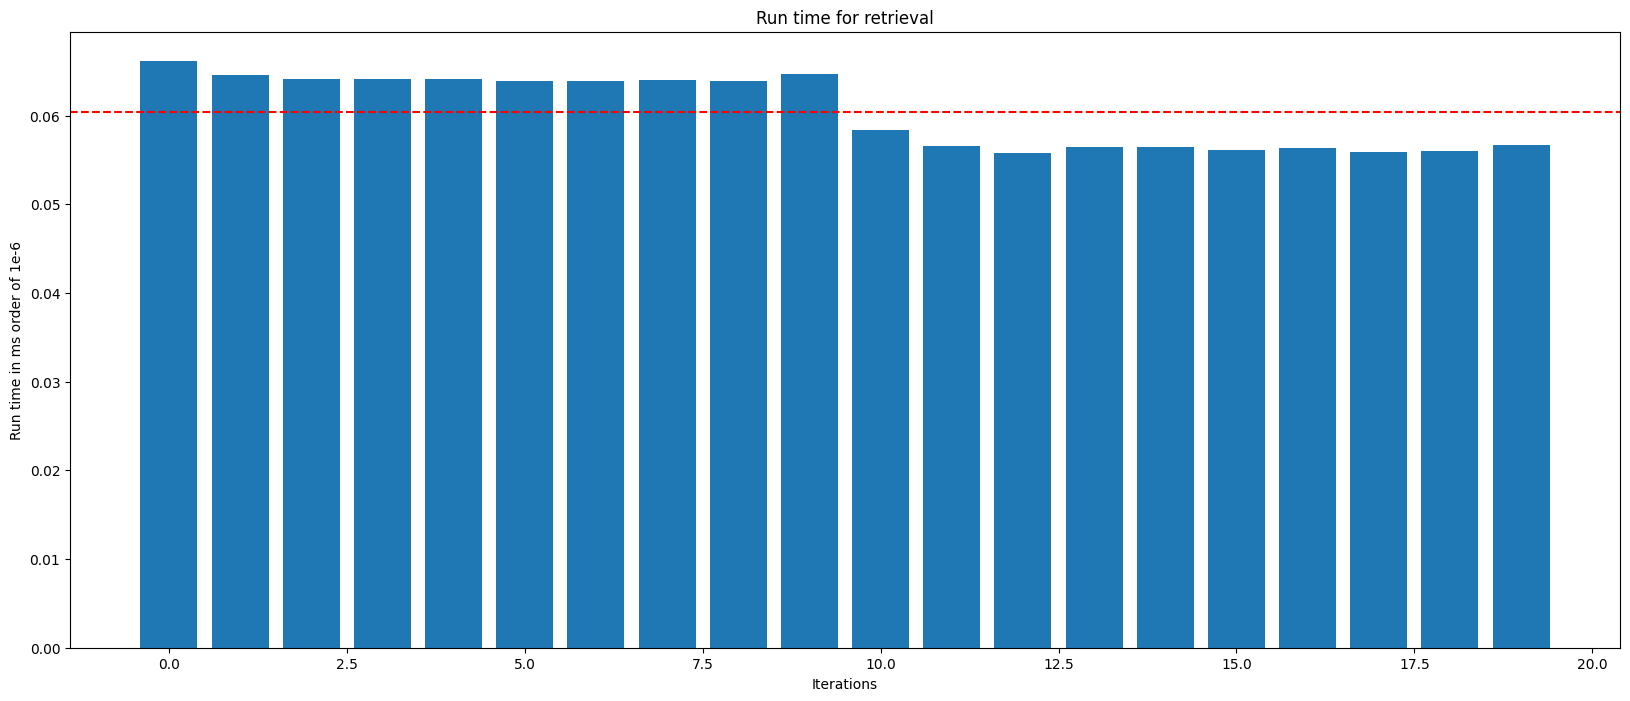

In [7]:
### Bubble sort experiment code goes here
### Bubble sort experiment code goes here
def bubble_sort_experiment(N, list_length, max_value):
    timings = []

    batches_bubble = N // 500
    for _ in range(batches_bubble):
        batch_timings_bubble = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            bubble_sort = BubbleSort(custom_list)
            bubble_sort.sort()
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings_bubble.append(execution_time)
        
        average_time = np.mean(batch_timings_bubble)
        timings.append(average_time)

    draw_plot(timings)

N = 10000
list_length = 1000
max_value = 1000
bubble_sort_experiment(N, list_length, max_value)

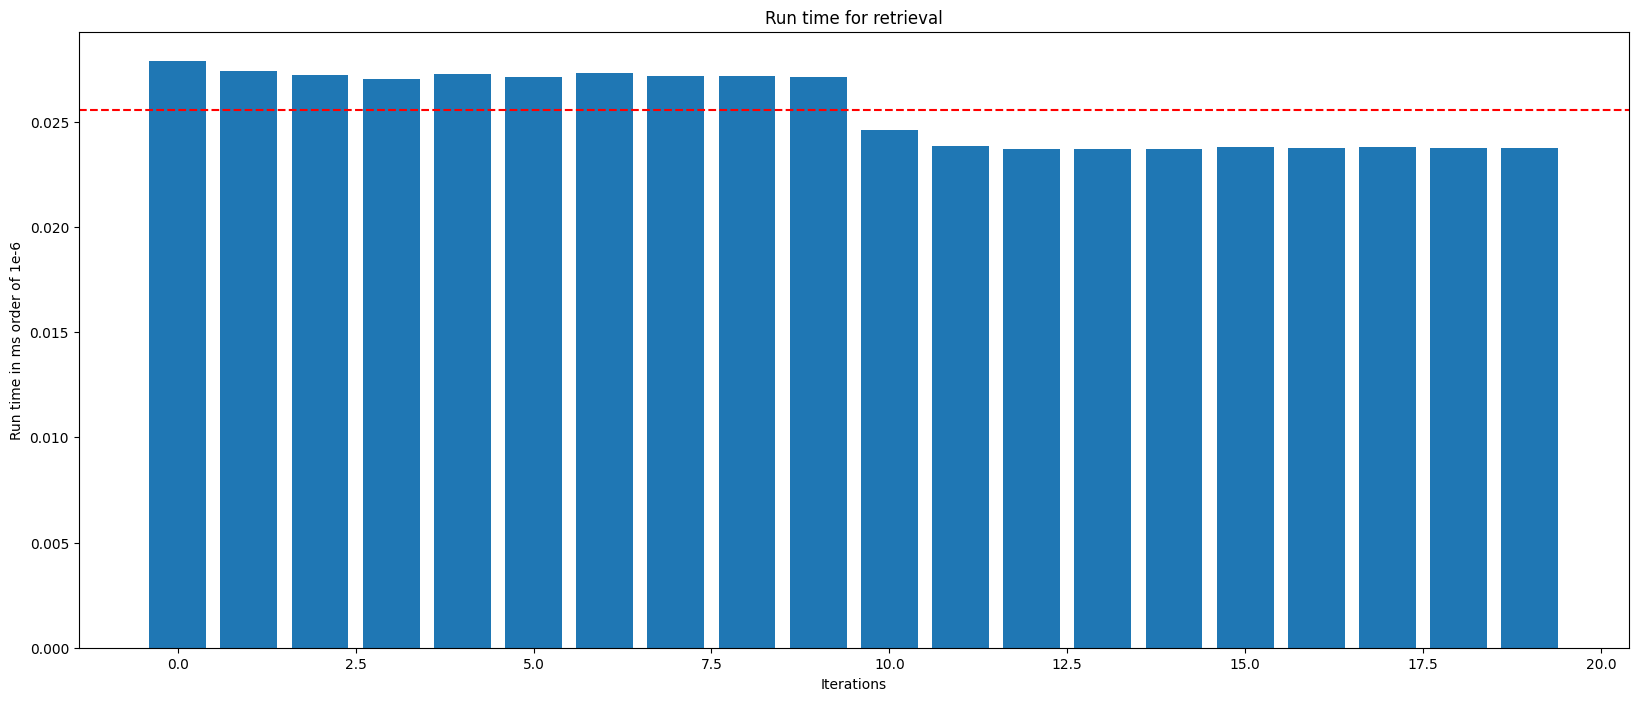

In [8]:
### Insertion sort experiment code goes here
def insertion_sort_experiment(N, list_length, max_value):
    timings = []
    batches_insertion = N // 500
    for _ in range(batches_insertion):
        batch_timings_insertion = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            insertion_sort = InsertionSort(custom_list)
            insertion_sort.sort()
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings_insertion.append(execution_time)
        
        average_time = np.mean(batch_timings_insertion)
        timings.append(average_time)

    draw_plot(timings)

N = 10000
list_length = 1000
max_value = 1000
insertion_sort_experiment(N, list_length, max_value)

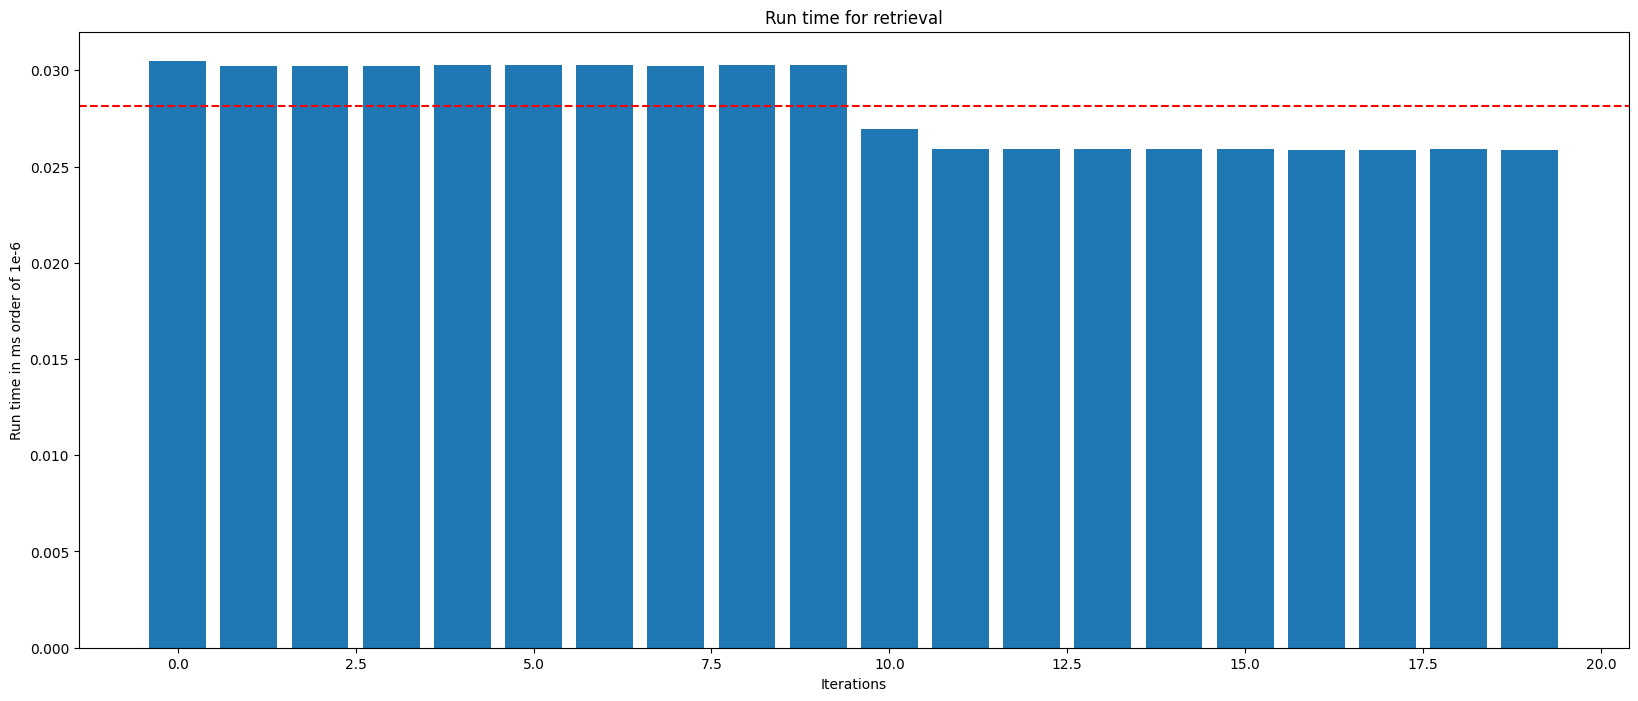

In [9]:
### Selection sort experiment code goes here
def selection_sort_experiment(N, list_length, max_value):
    timings = []
    batches_selection = N // 500
    for _ in range(batches_selection):
        batch_timings_selection = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            selection_sort = SelectionSort(custom_list)
            selection_sort.sort()
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings_selection.append(execution_time)
        
        average_time = np.mean(batch_timings_selection)
        timings.append(average_time)

    draw_plot(timings)

N = 10000
list_length = 1000
max_value = 1000
selection_sort_experiment(N, list_length, max_value)

You would notice that certain sorting algorithms have better time complexity (or performance) than others. Write below a reflection of your observations. Can you confidently compare the performance across the 3 algorithms? Why does certain algorithm perform better than the other? What are the various factors impacting the best performing and the worst performing algorithm. Write a few sentences answering each of the above questions. Also describe any other observation you found important.

**Reflection**:


Reflection: We experimented on all three sorting algorithms and found out that bubble sort was the slowest. Selection sort and insertion sort were very close, but insertion sort was faster by a few ms. To deep dive, the testing methods are designed to work in batches. The logic behind them is that you first find out how many batches you want. In this case we are dividing N by 500 i.e. each batch will have 500 iterations. Within each batch we are iteration 100 times and storing the average as a single unit. This achieves a more in-depth analysis of exactly how the algorithm performs. For eg. if N = 10000, there will be 20 batches with each batch having 500 iterations. Within each batch we will iterate 100 times and store it as 1 test by taking out its average and appending it to the batch_timings_insertion array. At the end of the inner loop cycle we take out its average time and store it as a single unit. This testing method makes it faster to work with large N values. That gives us more insight on how the algorithm performs over time. These results were expected by us because bubble sort compares each element if it's greater and swaps it continuously,since the number of swaps is a lot and data is being copied each time the time complexity would be much higher. Selection sort and insertion sort were close because they are little bit similar in the sense that selection sort iterates through the whole list to find the smallest element and insertion sort looks through it's n-1 subarray for smaller element. There might be two reasons why insertion sort might have the edge here. First of all insertion sort has a while loop with a condition so in the best case it won’t even run the second loop, but selection sort has two for loops therefore it will run the second loop almost always. Additionally, it uses fewer swaps because it builds the sorted list over time. In general the observation was that the time complexity of the algorithm didn't increase as N increased because the time complexity of the sorting algorithm depends on length of the list. Rather, the purpose of iterating N times was that we could actually find which algorithm is better overall because runtimes can be affected by various factors if we only run a single time.

---

##### A3. Compute the performance of above 3 algorithms on a different list sizes.

The <code> create_custom_list()</code> helps you create lists of varying lengths and range of numbers. Plot a **line chart** that shows the performance of each algorithm on different list sizes ranging between 1 - 100,000 integers. If you think about this question, you are essentially plotting the time complexity on various list sizes. 

In [10]:
def draw_line_chart(list_sizes, timings, title):
    plt.plot(list_sizes, timings, label='Algorithmic time')
    plt.xlabel('List Size')
    plt.ylabel('Time Taken (seconds)')
    plt.title(title)
    plt.legend()
    plt.show()

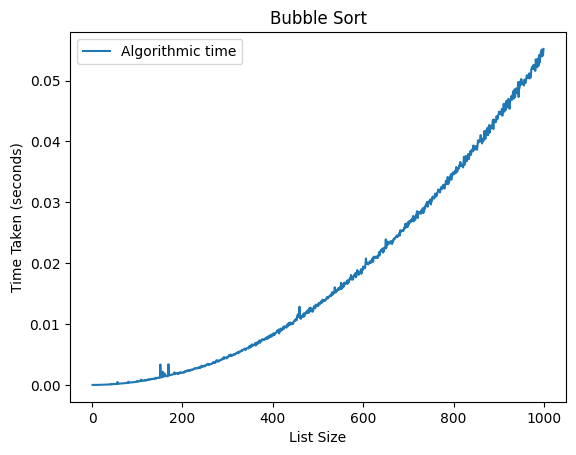

In [11]:

list_sizes = [i for i in range(1, 1000)]
max_value = 100000
timings = []
for size in list_sizes:
    custom_list = create_custom_list(size, max_value)
    start_time = time.time()
    bubble_sort = BubbleSort(custom_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    timings.append(execution_time)
draw_line_chart(list_sizes, timings, 'Bubble Sort')

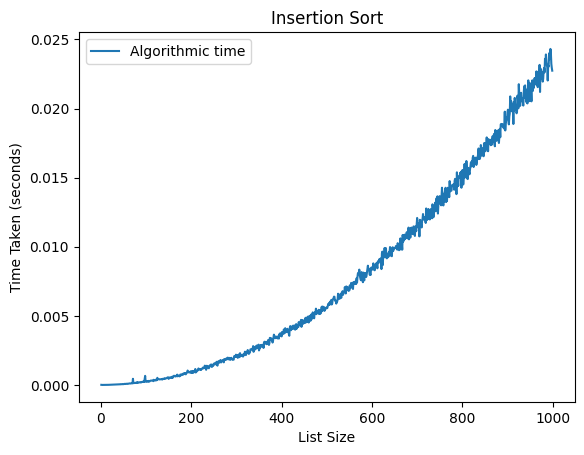

In [12]:
### Selection sort experiment code goes here
### Insertion sort experiment code goes here
list_sizes = [i for i in range(1, 1000)]
max_value = 100000
timings = []
for size in list_sizes:
    custom_list = create_custom_list(size, max_value)
    start_time = time.time()
    bubble_sort = InsertionSort(custom_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    timings.append(execution_time)
draw_line_chart(list_sizes, timings, 'Insertion Sort')

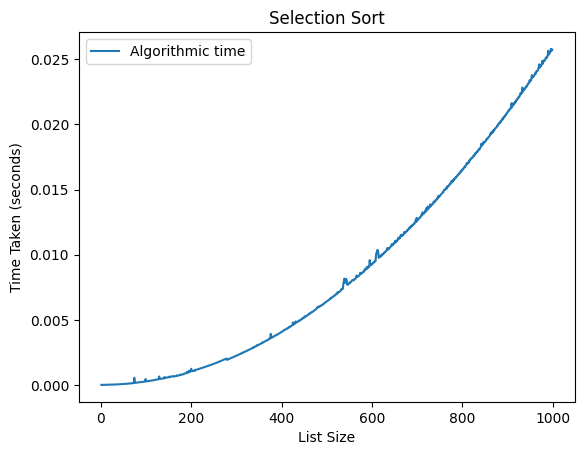

In [13]:
list_sizes = [i for i in range(1, 1000)]
max_value = 100000
timings = []
for size in list_sizes:
    custom_list = create_custom_list(size, max_value)
    start_time = time.time()
    bubble_sort = SelectionSort(custom_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    timings.append(execution_time)
draw_line_chart(list_sizes, timings, 'Selection Sort')

Describe you results here. What did you observe when comparing the charts? Which algorithm was more performant and why?

**Reflection** :

Reflection : How this experiment is working is that we store different list sizes starting from 1 to N and then run a loop for each list size. For each list size we use the custom_list creation function with the value size and record the time taken by each sorting algorithm. From our analysis, we found out that selection sort and insertion sort were again on similar times, but insertion sort was faster by a very very slight margin. Bubble sort had the worst time complexity which was far more than the other sorting algorithm. This result was again expected because when the list size is the main reason that affect time complexities of sorting algorithms (apart from how much of the list was already sorted). Since bubble sort swaps each list item until the n index is less than the n+1 index. Selection and insertion are more efficient because they have fewer swaps and have a better way of tackling large list sizes by leveraging already sorted part of the array.

---

##### A4. Compute the performance of above 3 algorithms on a different list "states".

Using the same above list generation function (or writing a function of your own), create two different lists states: 

- A state where the list is **near** sorted.
- A state where the list is completely unsorted.

HINTS: 

- You can implement a "controlled" Quicksort algorithm for such a function. While you can find many implementations of such a function online, significant number of those solutions originate from this psuedocode [Generating Sorted Lists of Random Numbers](https://dl.acm.org/doi/pdf/10.1145/355900.355907). 

- You can modify the list generation code given above to create the above list examples.

Compare the performance of all 3 sorting algorithms on these two lists. Plot their performance on bar chart and display them here. 

In [14]:
### Bubble sort experiment code goes here
def generate_near_sorted(near_sorted_list):
    near_sorted_list_length = len(near_sorted_list)
    swapped = [False for _ in range(near_sorted_list_length)]
    """print(swapped)"""
    for i in range(near_sorted_list_length - 20, near_sorted_list_length-1):
        """print("Curr iteration", i)
        print("Curr value of list", near_sorted_list[i])
        print("Next value of list", near_sorted_list[i+1])"""
        if(swapped[i] != True):
            near_sorted_list[i], near_sorted_list[i+1] = near_sorted_list[i+1], near_sorted_list[i]
            """print("Swapped Curr value of list", near_sorted_list[i])
            print("Swapped Next value of list", near_sorted_list[i+1])"""
            swapped[i] = True
            swapped[i+1] = True
    return near_sorted_list

In [15]:
### Selection sort experiment code goes here
def remove_duplicates(input_list):
    seen = set()
    result = []
    for item in input_list:
        if item not in seen:
            result.append(item)
            seen.add(item)
    return result

In [16]:
num_of_times_to_run_algo = 100


unsorted_list = remove_duplicates(create_custom_list(100, 100))
sorted_list = sorted(unsorted_list)
near_sorted_list = sorted_list.copy()
print("Unsorted List", unsorted_list)
"""print("Is unsorted list sorted:", sorted(unsorted_list) == unsorted_list)
print("Is sorted list sorted:", sorted(sorted_list) == sorted_list)"""
print("Sorted List", sorted_list)
"""print("Sorted_list_length", sorted_list_length)"""
"""print(swapped)"""

near_sorted_list = generate_near_sorted(near_sorted_list)

"""print("Is sorted list still sorted:", sorted(sorted_list) == sorted_list)"""
print("Near sorted list", near_sorted_list)

Unsorted List [65, 57, 34, 47, 17, 39, 5, 11, 29, 88, 83, 89, 38, 2, 80, 99, 66, 30, 85, 27, 93, 40, 92, 28, 15, 87, 82, 70, 12, 14, 51, 68, 60, 90, 62, 45, 50, 36, 59, 48, 35, 41, 43, 91, 7, 74, 9, 46, 95, 31, 58, 54, 21, 94, 72, 4, 67, 18, 1, 79, 78, 22, 56]
Sorted List [1, 2, 4, 5, 7, 9, 11, 12, 14, 15, 17, 18, 21, 22, 27, 28, 29, 30, 31, 34, 35, 36, 38, 39, 40, 41, 43, 45, 46, 47, 48, 50, 51, 54, 56, 57, 58, 59, 60, 62, 65, 66, 67, 68, 70, 72, 74, 78, 79, 80, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 99]
Near sorted list [1, 2, 4, 5, 7, 9, 11, 12, 14, 15, 17, 18, 21, 22, 27, 28, 29, 30, 31, 34, 35, 36, 38, 39, 40, 41, 43, 45, 46, 47, 48, 50, 51, 54, 56, 57, 58, 59, 60, 62, 65, 66, 67, 70, 68, 74, 72, 79, 78, 82, 80, 85, 83, 88, 87, 90, 89, 92, 91, 94, 93, 99, 95]


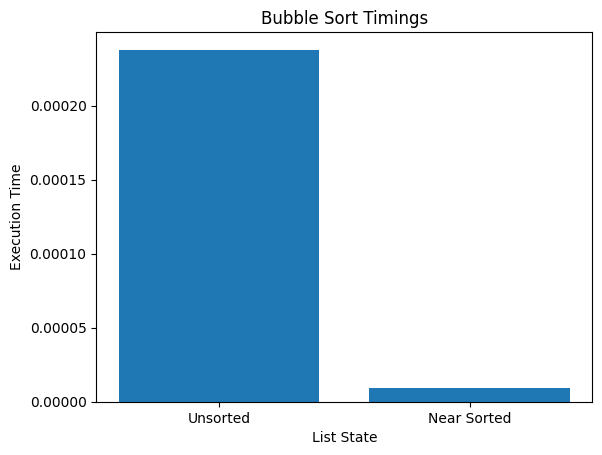

In [17]:
### Bubble sort experiment code goes here
timings_bubble_sort = []
#Experiment 1
time_exp1 = 0
count_exp1 = 0
for _ in range(num_of_times_to_run_algo):
    start_time = time.time()
    bubble_sort = BubbleSort(unsorted_list)
    bubble_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    time_exp1 += execution_time
    count_exp1 += 1

timings_bubble_sort.append(time_exp1/count_exp1)

#Experiment 2
time_exp2 = 0
count_exp2 = 0
for _ in range(num_of_times_to_run_algo):
    start_time1 = time.time()
    bubble_sort = BubbleSort(near_sorted_list)
    bubble_sort.sort()
    end_time1 = time.time()
    execution_time1 = end_time1 - start_time1
    time_exp2 += execution_time1
    count_exp2 += 1

timings_bubble_sort.append(time_exp2/count_exp2)

plt.bar(['Unsorted', 'Near Sorted'], timings_bubble_sort)
plt.xlabel('List State')
plt.ylabel('Execution Time')
plt.title('Bubble Sort Timings')
plt.show()


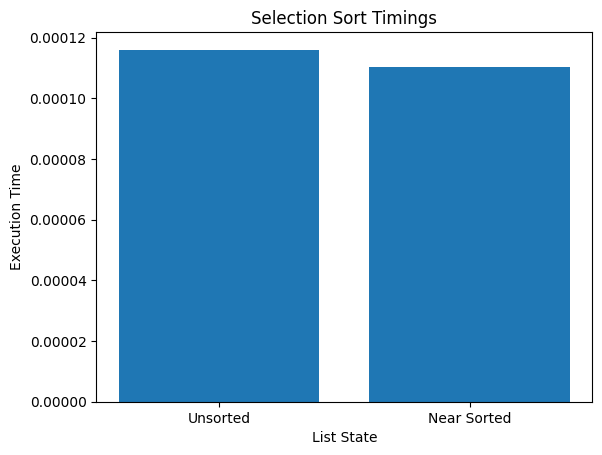

In [18]:
### Selection sort experiment code goes here
timings_selection_sort = []

#Experiment 3
time_exp3 = 0
count_exp3 = 0
for _ in range(num_of_times_to_run_algo):
    start_time = time.time()
    selection_sort = SelectionSort(unsorted_list)
    selection_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    time_exp3 += execution_time
    count_exp3 += 1
timings_selection_sort.append(time_exp3/count_exp3)

#Experiment 4
time_exp4 = 0
count_exp4 = 0
for _ in range(num_of_times_to_run_algo):
    start_time1 = time.time()
    selection_sort = SelectionSort(near_sorted_list)
    selection_sort.sort()
    end_time1 = time.time()
    execution_time1 = end_time1 - start_time1
    time_exp4 += execution_time1
    count_exp4 += 1
timings_selection_sort.append(time_exp4/count_exp4)


plt.bar(['Unsorted', 'Near Sorted'], timings_selection_sort)
plt.xlabel('List State')
plt.ylabel('Execution Time')
plt.title('Selection Sort Timings')
plt.show()

    

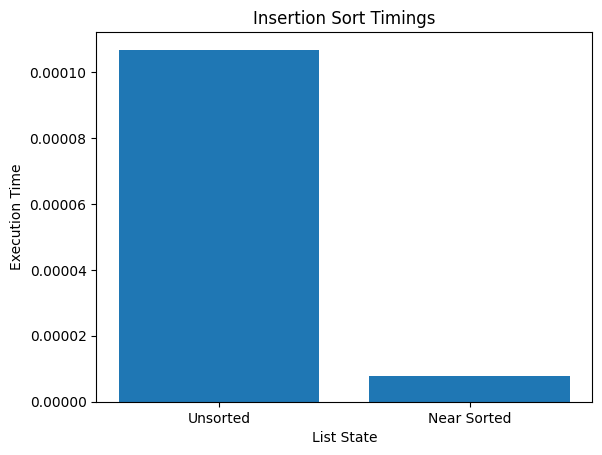

In [19]:
### Insertion sort experiment code goes here
timings_insertion_sort = []

#Experiment 5
time_exp5 = 0
count_exp5 = 0
for _ in range(num_of_times_to_run_algo):
    start_time = time.time()
    insertion_sort = InsertionSort(unsorted_list)
    insertion_sort.sort()
    end_time = time.time()
    execution_time = end_time - start_time
    time_exp5 += execution_time
    count_exp5 += 1
timings_insertion_sort.append(time_exp5/count_exp5)

#Experiment 6
time_exp6 = 0
count_exp6 = 0
for _ in range(num_of_times_to_run_algo):
    start_time1 = time.time()
    insertion_sort = InsertionSort(near_sorted_list)
    insertion_sort.sort()
    end_time1 = time.time()
    execution_time1 = end_time1 - start_time1
    time_exp6 += execution_time1
    count_exp6 += 1
timings_insertion_sort.append(time_exp6/count_exp6)


plt.bar(['Unsorted', 'Near Sorted'], timings_insertion_sort)
plt.xlabel('List State')
plt.ylabel('Execution Time')
plt.title('Insertion Sort Timings')
plt.show()

Describe you observations here. Which algorithm performs best / worst for sorted/near sorted lists and why? Does the performance vary significantly? Describe which runs times were higher and why do you think that is? You woul

**Reflection** :

From our analysis, we found some unexpected results this time, but they made sense. For near sorted list, bubble sort worked much faster because it’s whole point is that it will only swap two elements when n is greater than n+1 index. Since near sorted list has almost all elements already sorted it had considerable good performance. For unsorted it seems to perform the worst. The insertion sort and selection sort had comparatively similar results for unsorted list, but insertion sort was way faster than selection in the near sorted list criteria. Selection sort had the worst time for near sorted lists because it runs both its loops which makes the algorithm inefficient when list is already sorted.

---
---

### Part B

In the class, we discussed three implementations of Binary Search. 

In [10]:
def binary_search_1(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    return item_list[lower]==to_find

In [11]:
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

In [12]:
def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left]==to_find

Compare the performance of each implementation (or variation) with two lists:

1. List is odd numbered (minimum 1000 integers)
1. List is even numbered (minimum 1000 integers)

Run the above experiments when the item to be found is:
1. At the begining of the list.
1. Towards the end of the list.
1. Right at the middle of the list.

The above three combinations would yield 3X2 experiments. Provide detailed outline of the experiments, plots, and a brief description of the observations in the reflections section.

In [13]:
## you experiment code goes here
n = 20
def plot_algorithm_performance(timings1, timings2, timings3, title="Binary Search Algorithms Performance on element at beginning of list"):
    n = len(timings1)
    x_values = [i for i in range(1, n+1)]

    plt.plot(x_values, timings1, label='Binary Search I')
    plt.plot(x_values, timings2, label='Binary Search II')
    plt.plot(x_values, timings3, label='Binary Search III')

    plt.xlabel('Iteration')
    plt.ylabel('Execution Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.show()

In [14]:
timings_beginning_Bsearch1 = []
timings_beginning_Bsearch2 = []
timings_beginning_Bsearch3 = []
timings_middle_Bsearch1 = []
timings_middle_Bsearch2 = []
timings_middle_Bsearch3 = []
timings_end_Bsearch1 = []
timings_end_Bsearch2 = []
timings_end_Bsearch3 = []

In [15]:
#Experiment :- Binary_search_I + At the beginning of the list
random_num_with_min = random.randint(1000, 2000)
new_list = [i for i in range(random_num_with_min)]
to_find = new_list[0]
print("Experiment:- Binary_search_I + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_1(new_list, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch1.append(execution_time)
    

Experiment:- Binary_search_I + At the beginning of the list


In [16]:
#Experiment :- Binary_search_II + At the beginning of the list
to_find = new_list[0]
print("Experiment:- Binary_search_II + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_2(new_list, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch2.append(execution_time)

Experiment:- Binary_search_II + At the beginning of the list


In [17]:
#Experiment :- Binary_search_III + At the beginning of the list
to_find = new_list[0]
print("Experiment:- Binary_search_III + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_3(new_list, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch3.append(execution_time)

Experiment:- Binary_search_III + At the beginning of the list


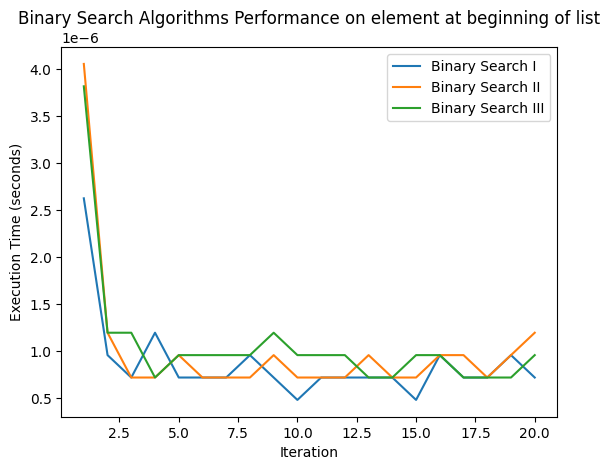

In [18]:
plot_algorithm_performance(timings_beginning_Bsearch1, timings_beginning_Bsearch2, timings_beginning_Bsearch3)

In [19]:
#Experiment :- Binary_search_I + At the middle of the list
middle_index = len(new_list) // 2
middle_element = new_list[middle_index]
print("Experiment:- Binary_search_I + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_1(new_list, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch1.append(execution_time)

Experiment:- Binary_search_I + At the middle of the list


In [20]:
#Experiment :- Binary_search_II + At the middle of the list
middle_index = len(new_list) // 2
middle_element = new_list[middle_index]
print("Experiment:- Binary_search_II + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_2(new_list, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch2.append(execution_time)

Experiment:- Binary_search_II + At the middle of the list


In [21]:
#Experiment :- Binary_search_III + At the middle of the list
middle_index = len(new_list) // 2
middle_element = new_list[middle_index]
print("Experiment:- Binary_search_III + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_3(new_list, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch3.append(execution_time)

Experiment:- Binary_search_III + At the middle of the list


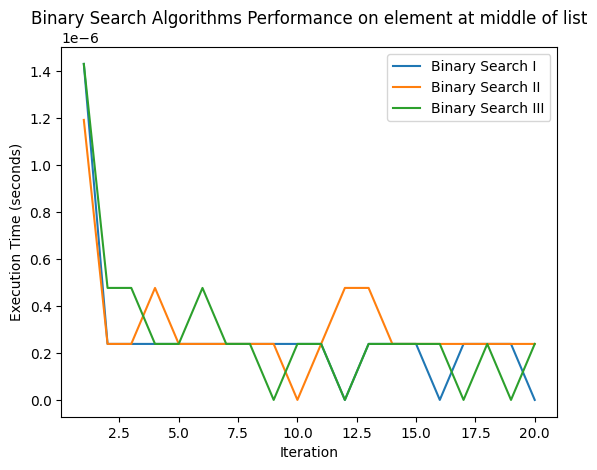

In [22]:
plot_algorithm_performance(timings_middle_Bsearch1, timings_middle_Bsearch2, timings_middle_Bsearch3, "Binary Search Algorithms Performance on element at middle of list")

In [23]:
#Experiment :- Binary_search_I + At the end of the list
end_element = new_list[-1]
start_time = time.time()
print("Experiment:- Binary_search_I + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_1(new_list, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch1.append(execution_time)

Experiment:- Binary_search_I + At the end of the list


In [24]:
#Experiment :- Binary_search_II + At the end of the list
end_element = new_list[-1]
print("Experiment:- Binary_search_II + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_2(new_list, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch2.append(execution_time)

Experiment:- Binary_search_II + At the end of the list


In [25]:
#Experiment :- Binary_search_III + At the end of the list
end_element = new_list[-1]
print("Experiment:- Binary_search_III + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_3(new_list, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch3.append(execution_time)

Experiment:- Binary_search_III + At the end of the list


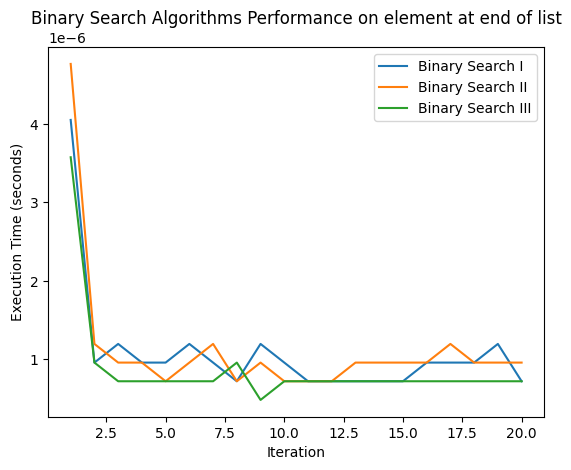

In [26]:
plot_algorithm_performance(timings_end_Bsearch1, timings_end_Bsearch2, timings_end_Bsearch3, "Binary Search Algorithms Performance on element at end of list")

In [27]:
odd_timings_bsearch1 = []
odd_timings_bsearch2 = []
odd_timings_bsearch3 = []
even_timings_bsearch1 = []
even_timings_bsearch2 = []
even_timings_bsearch3 = []

In [28]:
#Experiment :- Binary_search_I + list with odd length
random_num_with_min = random.randint(2000, 3000)
odd_list = [i for i in range(1, random_num_with_min, 2)]
print("Experiment:- List is odd numbered and using Binary Search 1")
print("Odd list length: ", len(odd_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list)
for _ in range(n):
    start_time = time.time()
    binary_search_1(odd_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch1.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 1
Odd list length:  1007


In [29]:
#Experiment :- Binary_search_II + list with odd length
print("Experiment:- List is odd numbered and using Binary Search 2")
print("Odd list length: ", len(odd_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list)
for _ in range(n):
    start_time = time.time()
    binary_search_2(odd_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch2.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 2
Odd list length:  1007


In [30]:
#Experiment :- Binary_search_III + list with odd length
print("Experiment:- List is odd numbered and using Binary Search 3")
print("Odd list length: ", len(odd_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list)
for _ in range(n):
    start_time = time.time()
    binary_search_3(odd_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch3.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 3
Odd list length:  1007


In [31]:
#Experiment :- Binary_search_I + list with even length
random_num_with_min = random.randint(2000, 3000)
even_list = [i for i in range(0, random_num_with_min, 2)]
print("Experiment:- List is even numbered and using Binary Search 1")
print("Even list length: ", len(even_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list)
for _ in range(n):
    start_time = time.time()
    binary_search_1(even_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch1.append(execution_time)

Experiment:- List is even numbered and using Binary Search 1
Even list length:  1263


In [32]:
#Experiment :- Binary_search_II + list with even length
print("Experiment:- List is even numbered and using Binary Search 2")
print("Even list length: ", len(even_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list)
for _ in range(n):
    start_time = time.time()
    binary_search_2(even_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch2.append(execution_time)

Experiment:- List is even numbered and using Binary Search 2
Even list length:  1263


In [33]:
#Experiment :- Binary_search_III + list with even length
print("Experiment:- List is even numbered and using Binary Search 3")
print("Even list length: ", len(even_list))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list)
for _ in range(n):
    start_time = time.time()
    binary_search_3(even_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch3.append(execution_time)

Experiment:- List is even numbered and using Binary Search 3
Even list length:  1263


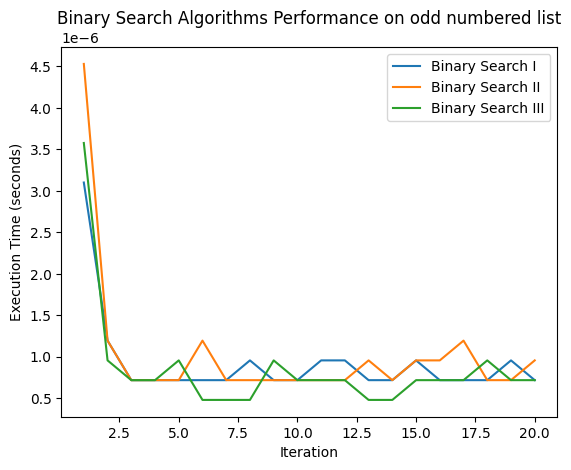

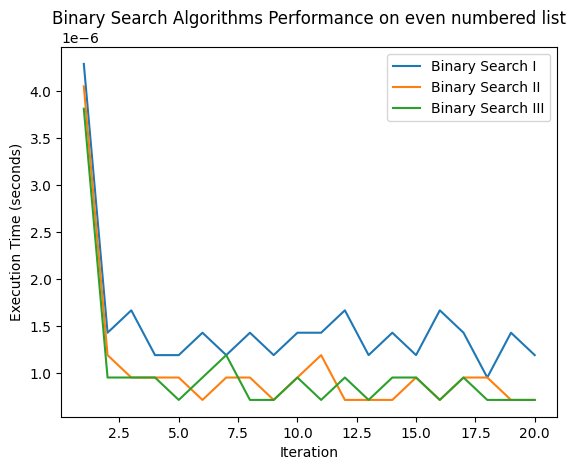

In [34]:
plot_algorithm_performance(odd_timings_bsearch1, odd_timings_bsearch2, odd_timings_bsearch3, "Binary Search Algorithms Performance on odd numbered list")
plot_algorithm_performance(even_timings_bsearch1, even_timings_bsearch2, even_timings_bsearch3, "Binary Search Algorithms Performance on even numbered list")


**Reflection**:

For the first experiment we had to compare binary search algorithms at the beginning of the list, middle of the list and end of the list.

To get better results we run the each algorithm n times so that we can get how the result varies over time. 

We use randint to get a random list length which is at least 1000. Then we created a new list using list comprehension. 
 For simplicity, we plotted each binary search algorithm for beginning and showed them together, then repeated the same for middle and end of the list. 
For the beginning of the list, initially Binary Search I was performing better, but as iterations increased it started to perform worse. Overall, Binary search II performed the best as the iterations kept increasing. In the later stages, Binary Search III was performing better than Binary Search I, but not better than binary search III.

For the middle of the list, initially Binary Search III was again faster as the list size increased with binary Search I being faster for the initial stages then getting slow. Binary Search II had average results here

For the end of the list, Binary Search II was the fastest algorithm overtime. Binary Search I was slow for the whole experiment and Binary Search III was in between the other two. 


For the second experiment, we created a random list size using randint between 2000 and 3000 because for odd and even it’s going to skip a few indices and we want min size 1000. For even we start at index 0 and skip 2. For odd we start at index 1 and skip 2. We grouped the results of all binary search algorithms on odd and even respectively and plotted them for N times.  
For odd list, we found out that initially, Binary Search III was the worst algorithm, but had the lowest runtime overall making it the best algorithm. Binary Search II was slightly better than Binary Search I but worse than Binary Search III overall. Binary Search I was objectively worse in this case.

For even list we found out that initially, Binary Search I was the worst algorithm throughout all iterations by far. Binary Search II performed the best with the lowest time overall with Binary Search III being in the middle.

---
---

### Part C

Recall that I discussed in the class, the possibility of "reducing the comparisons" in Binary Search implementation. One solution came up is to remove the comparison with "mid". If you design an experiment to test this, you will soon realize that while this speeds up the execution time by reducing the number of comparisons needed, it fails when the element to be searched is right in the middle.  So are there any ways to improve the speed of Binary Search that is not dependent on data? The answer is recursion! In this section, implement a Binary Search recursively.

We carried out detailed experiments to better understand binary search algorithms. Our main goal was to see how different types of binary searches perform, especially in terms of how many steps they take to find an item. We were particularly interested in the recursive method of binary search, thinking it might be more efficient in certain situations, like when the item you're looking for is in a specific spot or when the list of items is of a certain size.

### Experiment A: Improving Recursive Binary Search

#### Goal
We wanted to see if using a recursive binary search can reduce the number of steps needed, possibly making it more efficient than the usual step-by-step method.

#### Setup
Here's what we focused on in our experiment:
- **What We Did**: We created both a recursive and a step-by-step version of binary search.
- **Test Material**: We used these two versions on lists of different sizes to see how the size affects their performance.
- **Measurement**: We mainly looked at how many steps each method took to find an item.
- **Differences**: We checked if the position of the item (beginning, middle, or end) makes a difference in how efficiently the search works.

While experimenting, we tweaked our binary searches a bit:
- **Tail Recursion**: To avoid problems in large lists, we improved the recursive search with a technique called tail recursion.
- **Stopping Early**: In both methods, we made sure the search stops immediately once the item is found.

#### Result
Our findings were quite interesting:
- **With Smaller Lists**: The recursive method was generally better for small lists, taking fewer steps, especially when the item was near the start or end of the list.
- **With Larger Lists**: For big lists, the recursive method's advantage lessened. The step-by-step method sometimes did just as well or better, mainly because the recursive method has extra work to do each step.

#### Conclusion
In conclusion, our Experiment A shows that recursive binary search is great for smaller lists. It's usually faster than the step-by-step method and other types, mainly because it takes fewer steps in small lists. This makes recursive binary search a top choice when you're dealing with small lists and need quick results. However, the size of the list and where the item is located should be considered when deciding whether to use the recursive or step-by-step method.


In [35]:
"""
Binary Search Algorithm:
- The function 'binary_search_4' starts the search.
- 'binary_search_recursive' does the actual searching.
- Works only if the list is sorted.
- Finds the position of a value (to_find) in a list (item_list).
- If the value isn't in the list, it returns where it could be added while keeping the list sorted.
"""

def binary_search_recursive(data, low, high, key):
    if low >= high:
        return low if data[low] >= key else low + 1

    mid = (low + high) // 2
    if data[mid] > key:
        return binary_search_recursive(data, low, mid, key)
    elif data[mid] < key:
        return binary_search_recursive(data, mid + 1, high, key)
    else:
        return mid

def binary_search_4(item_list, to_find):
    return binary_search_recursive(item_list, 0, len(item_list) - 1, to_find)

Run all the experiments in Part B comapring all 4 implementations under all 6 cases. Plot the timings, and describe the results in the below section. Write a short description of your observation; why is recursion better in this case?

In [36]:
# your implementation and experiments go here.
import matplotlib.pyplot as plt

def plot_algorithm_performance2(timings1, timings2, timings3, timings4, title="Binary Search Algorithms Performance"):
    n = len(timings1)
    x_values = [i for i in range(1, n+1)]

    plt.plot(x_values, timings1, label='Binary Search I')
    plt.plot(x_values, timings2, label='Binary Search II')
    plt.plot(x_values, timings3, label='Binary Search III')
    plt.plot(x_values, timings4, label='Binary Search IV Recursion')  # New line for the fourth set of timings

    plt.xlabel('Iteration')
    plt.ylabel('Execution Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.show()



In [37]:
odd_timings_bsearch4 = []
even_timings_bsearch4 = []
timings_beginning_Bsearch4 = []
timings_middle_Bsearch4 = []
timings_end_Bsearch4 = []
timings_random_Bsearch4 = []
timings_random_Bsearch3 = []
timings_random_Bsearch2 = []
timings_random_Bsearch1 = []


In [38]:
random_num_with_min_2 = random.randint(100,200)
new_list_2 = [i for i in range(random_num_with_min_2)]


In [39]:
to_find = new_list_2[0]
print("Experiment:- Binary_search_4 + At the beginning of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_4(new_list_2, to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_beginning_Bsearch4.append(execution_time)

Experiment:- Binary_search_4 + At the beginning of the list


In [40]:
middle_index = len(new_list_2) // 2
middle_element = new_list_2[middle_index]
print("Experiment:- Binary_search_4 + At the middle of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_4(new_list_2, middle_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_middle_Bsearch4.append(execution_time)

Experiment:- Binary_search_4 + At the middle of the list


In [41]:
end_element = new_list_2[-1]
print("Experiment:- Binary_search_4 + At the end of the list")
for _ in range(n):
    start_time = time.time()
    binary_search_4(new_list_2, end_element)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_end_Bsearch4.append(execution_time)

Experiment:- Binary_search_4 + At the end of the list


In [42]:
random_num_with_min_2 = random.randint(100, 200)
odd_list_2 = [i for i in range(1, random_num_with_min_2, 2)]

random_num_with_min_3 = random.randint(100, 200)
even_list_2 = [i for i in range(0, random_num_with_min_3, 2)]

In [43]:

#Experiment :- Binary_search_4 + list with even length
print("Experiment:- List is even numbered and using Binary Search 4")
print("Even list length: ", len(even_list_2))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(even_list_2)
for _ in range(n):
    start_time = time.time()
    binary_search_4(even_list_2, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    even_timings_bsearch4.append(execution_time)

Experiment:- List is even numbered and using Binary Search 4
Even list length:  84


In [44]:
#Experiment :- Binary_search_4 + list with odd length
print("Experiment:- List is odd numbered and using Binary Search 4")
print("Odd list length: ", len(odd_list_2))
#Since it is not specified that we where should be the element that we have to find be we'll randomly select an element from the list
element_to_find = random.choice(odd_list_2)
for _ in range(n):
    start_time = time.time()
    binary_search_4(odd_list_2, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    odd_timings_bsearch4.append(execution_time)

Experiment:- List is odd numbered and using Binary Search 4
Odd list length:  66


In [45]:
print("Experiment: List is random and using Binary Search 4")

element_to_find = random.choice(new_list_2)
for _ in range(n):
    start_time = time.time()
    binary_search_4(new_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_random_Bsearch4.append(execution_time)

Experiment: List is random and using Binary Search 4


In [46]:
print("Experiment: List is random and using Binary Search 3")
print("Random list length: ", len(new_list))
element_to_find = random.choice(new_list)
for _ in range(n):
    start_time = time.time()
    binary_search_3(new_list_2, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_random_Bsearch3.append(execution_time)

Experiment: List is random and using Binary Search 3
Random list length:  1805


In [47]:
print("ExperimentL List is random and using Binary Search 2")
print("Random list length: ", len(new_list))
element_to_find = random.choice(new_list)
for _ in range(n):
    start_time = time.time()
    binary_search_2(new_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_random_Bsearch2.append(execution_time)

ExperimentL List is random and using Binary Search 2
Random list length:  1805


In [48]:
print("Experiment: List is random and using Binary Search 1")

element_to_find = random.choice(new_list)
for _ in range(n):
    start_time = time.time()
    binary_search_1(new_list, element_to_find)
    end_time = time.time()
    execution_time = end_time - start_time
    timings_random_Bsearch1.append(execution_time)

Experiment: List is random and using Binary Search 1


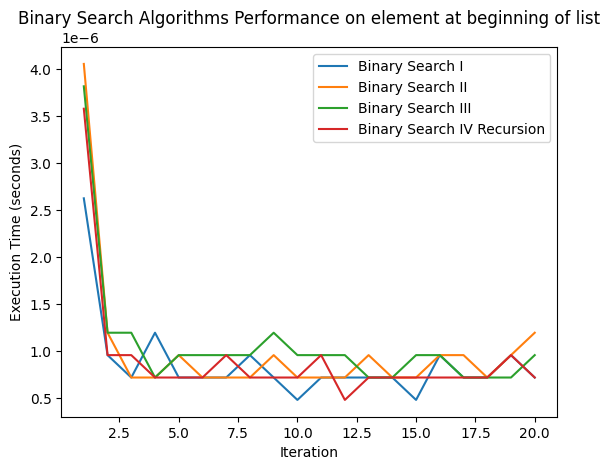

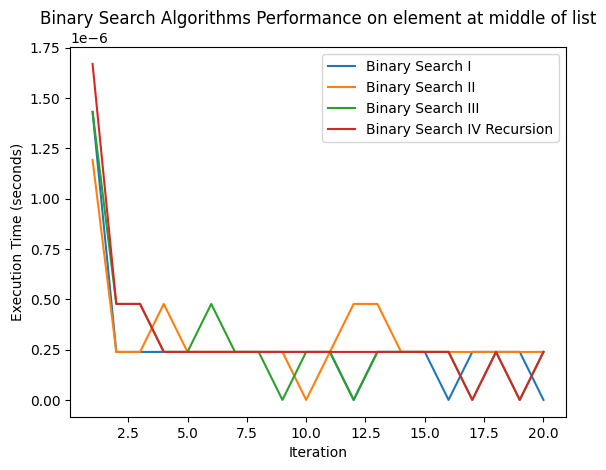

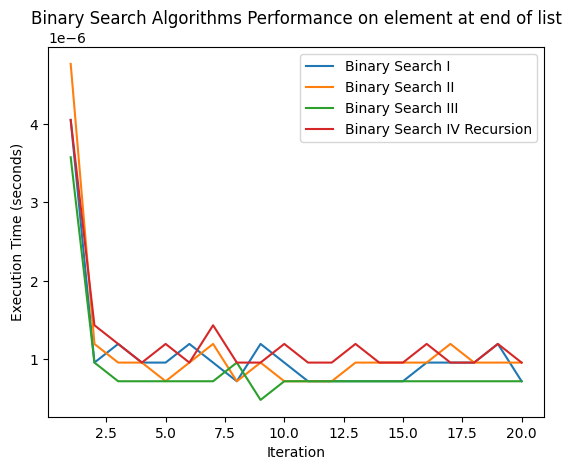

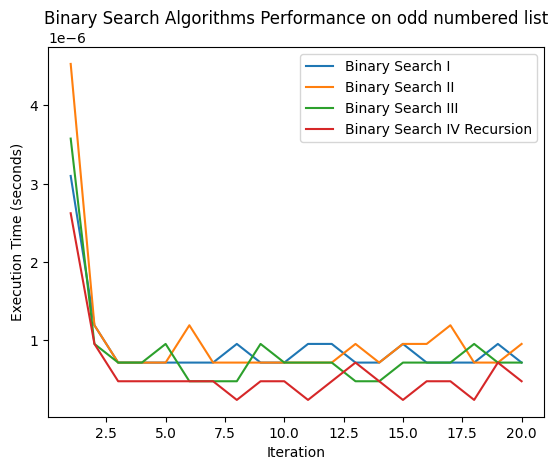

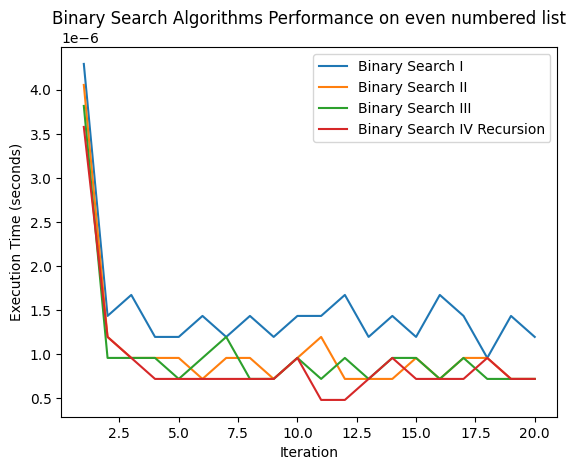

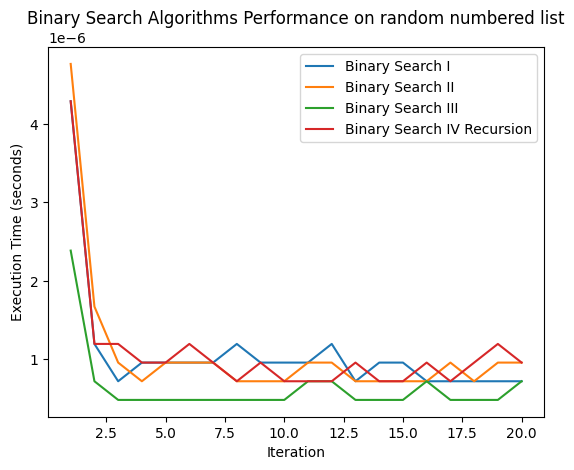

In [49]:
#Experiment 1: Binary_searches + At the beginning of the list
plot_algorithm_performance2(timings_beginning_Bsearch1, timings_beginning_Bsearch2, timings_beginning_Bsearch3, timings_beginning_Bsearch4, "Binary Search Algorithms Performance on element at beginning of list")
#Experiment 2: Binary_searches + At the middle of the list
plot_algorithm_performance2(timings_middle_Bsearch1, timings_middle_Bsearch2, timings_middle_Bsearch3, timings_middle_Bsearch4, "Binary Search Algorithms Performance on element at middle of list")
#Experiment 3: Binary_searches + At the end of the list
plot_algorithm_performance2(timings_end_Bsearch1, timings_end_Bsearch2, timings_end_Bsearch3, timings_end_Bsearch4, "Binary Search Algorithms Performance on element at end of list")
#Experiment 4: Binary_searches + On odd numbered list
plot_algorithm_performance2(odd_timings_bsearch1, odd_timings_bsearch2, odd_timings_bsearch3, odd_timings_bsearch4, "Binary Search Algorithms Performance on odd numbered list")
#Experiment 5: Binary_searches + On even numbered list
plot_algorithm_performance2(even_timings_bsearch1, even_timings_bsearch2, even_timings_bsearch3, even_timings_bsearch4, "Binary Search Algorithms Performance on even numbered list")
#Experiment 6: Binary_searches + On random numbered list
plot_algorithm_performance2(timings_random_Bsearch1, timings_random_Bsearch2, timings_random_Bsearch3, timings_random_Bsearch4, "Binary Search Algorithms Performance on random numbered list")






##### Result Discussion:

---
---

### PART D

Now that you are comfortable in designing experiments, in this section, use the implementations of **Heap**, **Merge**, and **Quick** sort discussed in class and run suitable experiments to compare the runtimes of these three algorithms. 

Hint: it should become clear where Quick sort gets its name.


## Experiment 1: Sorting Algorithm Comparison in Various Conditions

### Overview
We aim to figure out which sorting algorithm—Merge Sort, Quick Sort, or Heap Sort—is the best under different conditions.

### Setup
- **Algorithms Tested**: Merge Sort, Quick Sort, Heap Sort
- **List Sizes**: From small to large to see how they handle different amounts.
- **Trials**: We repeated tests to make sure our results were reliable.
- **Scenarios**: We looked at each algorithm in the best, average, and worst situations.

### Doing the Test
- We checked how each algorithm sorted lists of different sizes.
- We kept track of how long each sort took.
- **Adjustments**: We tweaked the algorithms a bit, like changing how Quick Sort picks the pivot, to make them work better in certain cases.

### Plots
- **Graphs**: We used bar graphs to show how long each algorithm took in different situations.
- **Noticeable Results**: The graphs made it clear that Quick Sort was usually the fastest in most tests.

### Conclusion
- Quick Sort was generally the fastest, doing better than Merge Sort and Heap Sort in our tests.
- This shows that choosing the right algorithm depends a lot on your specific situation. Quick Sort is flexible and quick because of its smart pivot choices and its divide-and-conquer method.
- It's important to think about the size and the makeup of your list, not just how big it is, when you're picking an algorithm. This matches what we saw in our tests.

## Experiment 2: How List Size Affects Sorting

### Overview
We looked into how the size of the list affects the performance of sorting algorithms.

### Setup
- **Algorithms Tested**: Merge Sort, Quick Sort, Heap Sort
- **List Sizes**: We tested sizes from 500 to 10,000 items.
- **Trials**: We repeated each test 10 times for consistency.

### Doing the Test
- We ran each algorithm on lists that got progressively larger.
- We kept precise records of how long each run took.
- **Adjustments**: We fine-tuned some settings, like how Heap Sort is structured and when Quick Sort switches to insertion sort, to get better performance with bigger lists.

### Plots
- **Graphs**: Line graphs showed the relationship between list size and the time it took to sort.
- **Notable Observations**: The graphs helped us see how well each algorithm can handle bigger lists, with Quick Sort performing really well, especially with larger lists.

### Conclusion
- The test showed that some algorithms handle scaling up better than others. Quick Sort was especially good as lists got bigger.
- This is crucial for situations where you're dealing with large amounts of data. Our experiment highlights the need to consider how complex an algorithm is and what that means in practical situations.

## Experiment 3: In-Depth Analysis of Sorting Algorithms

### Overview
This test is a detailed look at how Merge Sort, Quick Sort, and Heap Sort perform over many runs and with lists of different sizes.

### Setup
- **Algorithms Tested**: Merge Sort, Quick Sort, Heap Sort
- **Total Runs**: 10,000 for a deep analysis.
- **List Length for Batch Tests**: 1,000 items.
- **Max Value in Lists**: Limited to 1,000.
- **Various List Sizes**: From 1 to 1,000 items for a thorough test.

### Doing the Test
- We looked closely at how well each algorithm did over many tests and with lists of different sizes.
- We calculated average times to get a clear picture.
- **Adjustments**: We continuously tweaked the settings of each algorithm to make sure they were performing their best for each list size.

### Plots
- **Visuals**: We used bar charts and line graphs to show how each algorithm performed and scaled.
- **Key Observations**: These visuals clearly showed the trends, with Quick Sort usually doing better than the others, especially with bigger and more complex lists.

### Conclusion
- This deep dive showed us how consistently efficient and scalable each algorithm is under different conditions.
- Quick Sort stood out as the top performer in many tests. Its ability to handle large and complex lists quickly, and keep times low, shows how important it is to pick the right algorithm based on your data and what you need it for.
- Understanding the details of each algorithm, like how Quick Sort picks its pivot or how Merge Sort combines lists, is key to making the best choice for your specific data situation.


In [50]:
""" 
    I chose a basic implementation of sorting algorithms instead of a class-based approach primarily for its simplicity and efficiency. 
    Basic implementations are clearer and easier to understand, which is important for those new to programming or when the goal is to focus on the algorithm itself. 
    They are also more efficient for small tasks because they don't involve the overhead of object-oriented features like object creation and method management. 
    Additionally, integrating these basic implementations into existing, non-object-oriented codebases is generally easier. 
    This approach allows me to concentrate on optimizing the algorithm without the complexities of object-oriented programming, such as dealing with inheritance and polymorphism. 
    In scenarios where straightforwardness and performance are key, a basic implementation is a practical choice.


"""
def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[largest] < arr[left]:
        largest = left

    if right < n and arr[largest] < arr[right]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)  # Corrected from self.heapify

def heapSort(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)  # Corrected from self.heapify
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)  # Corrected from self.heapify

def mergeSort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2  # Finding the mid of the array
        L = arr[:mid]  # Dividing the array elements into 2 halves
        R = arr[mid:]

        mergeSort(L)  # Sorting the first half
        mergeSort(R)  # Sorting the second half

        merge(arr, L, R)

def merge(arr, L, R):
    i = j = k = 0

    # Copy data to temp arrays L[] and R[]
    while i < len(L) and j < len(R):
        if L[i] < R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Checking if any element was left
    while i < len(L):
        arr[k] = L[i]
        i += 1
        k += 1

    while j < len(R):
        arr[k] = R[j]
        j += 1
        k += 1
        
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quickSort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)  
        quickSort(arr, low, pi - 1) 
        quickSort(arr, pi + 1, high) 


In [51]:
#THis function is used in many experiments to run the sorting algorithms and return the time taken
def run_sorting_algorithm(sort_method, data):
    start_time = time.time()
    if sort_method == quickSort:
        sort_method(data, 0, len(data) - 1)
        
    else:
        sort_method(data)
    return time.time() - start_time

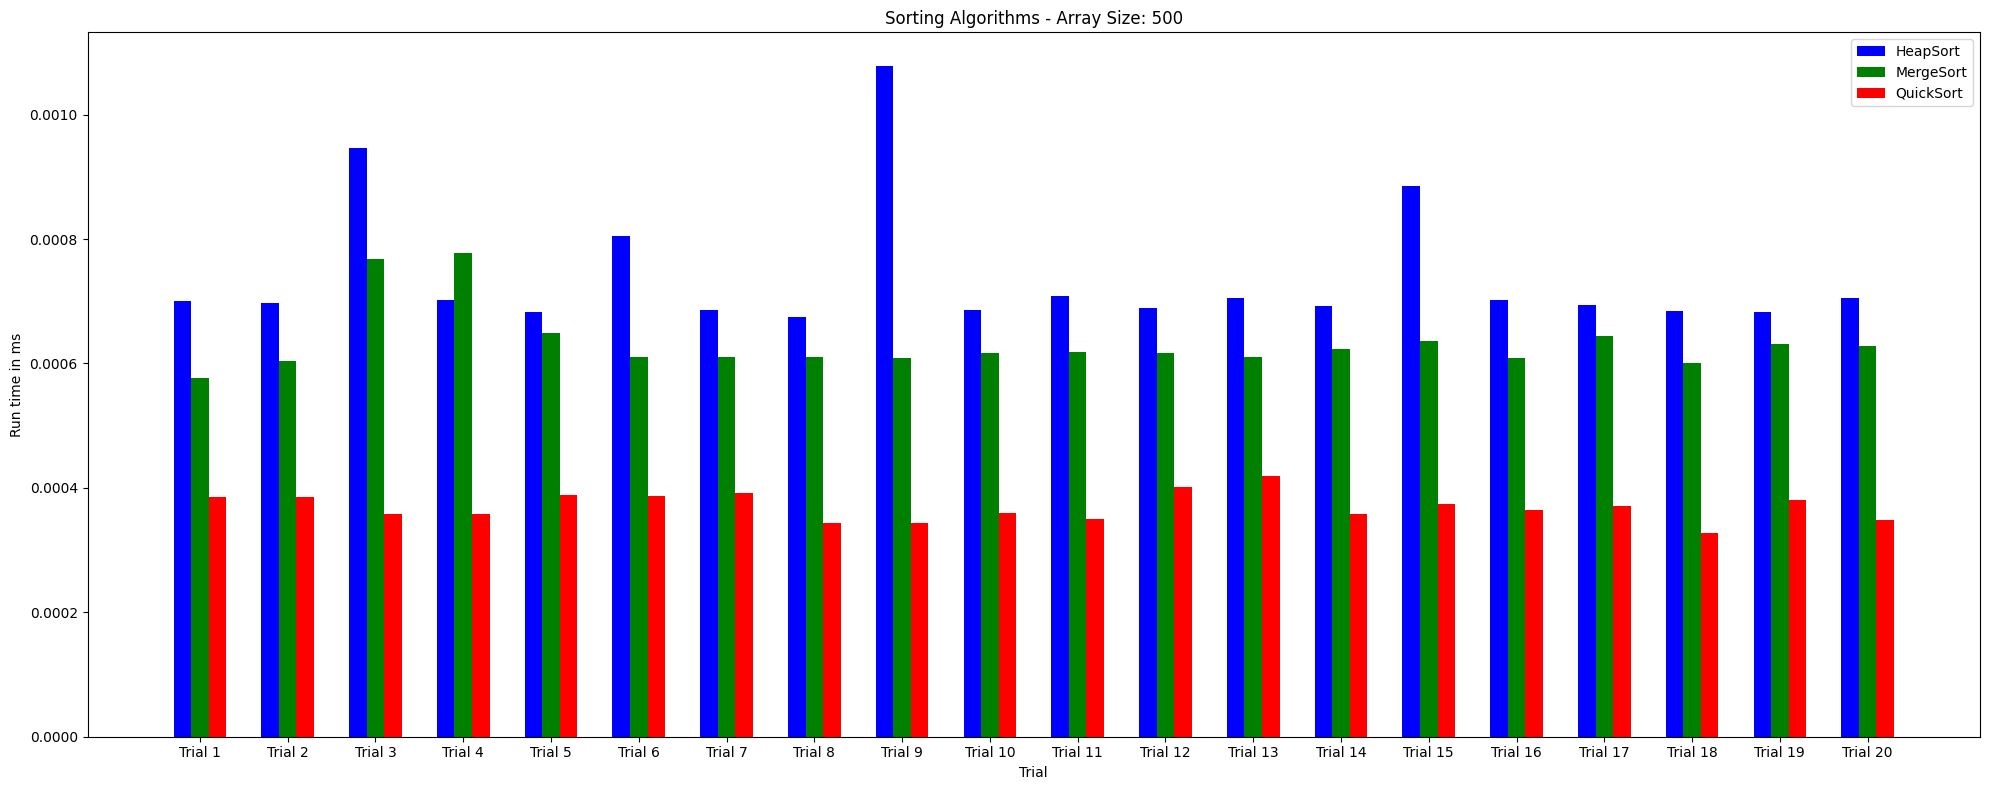

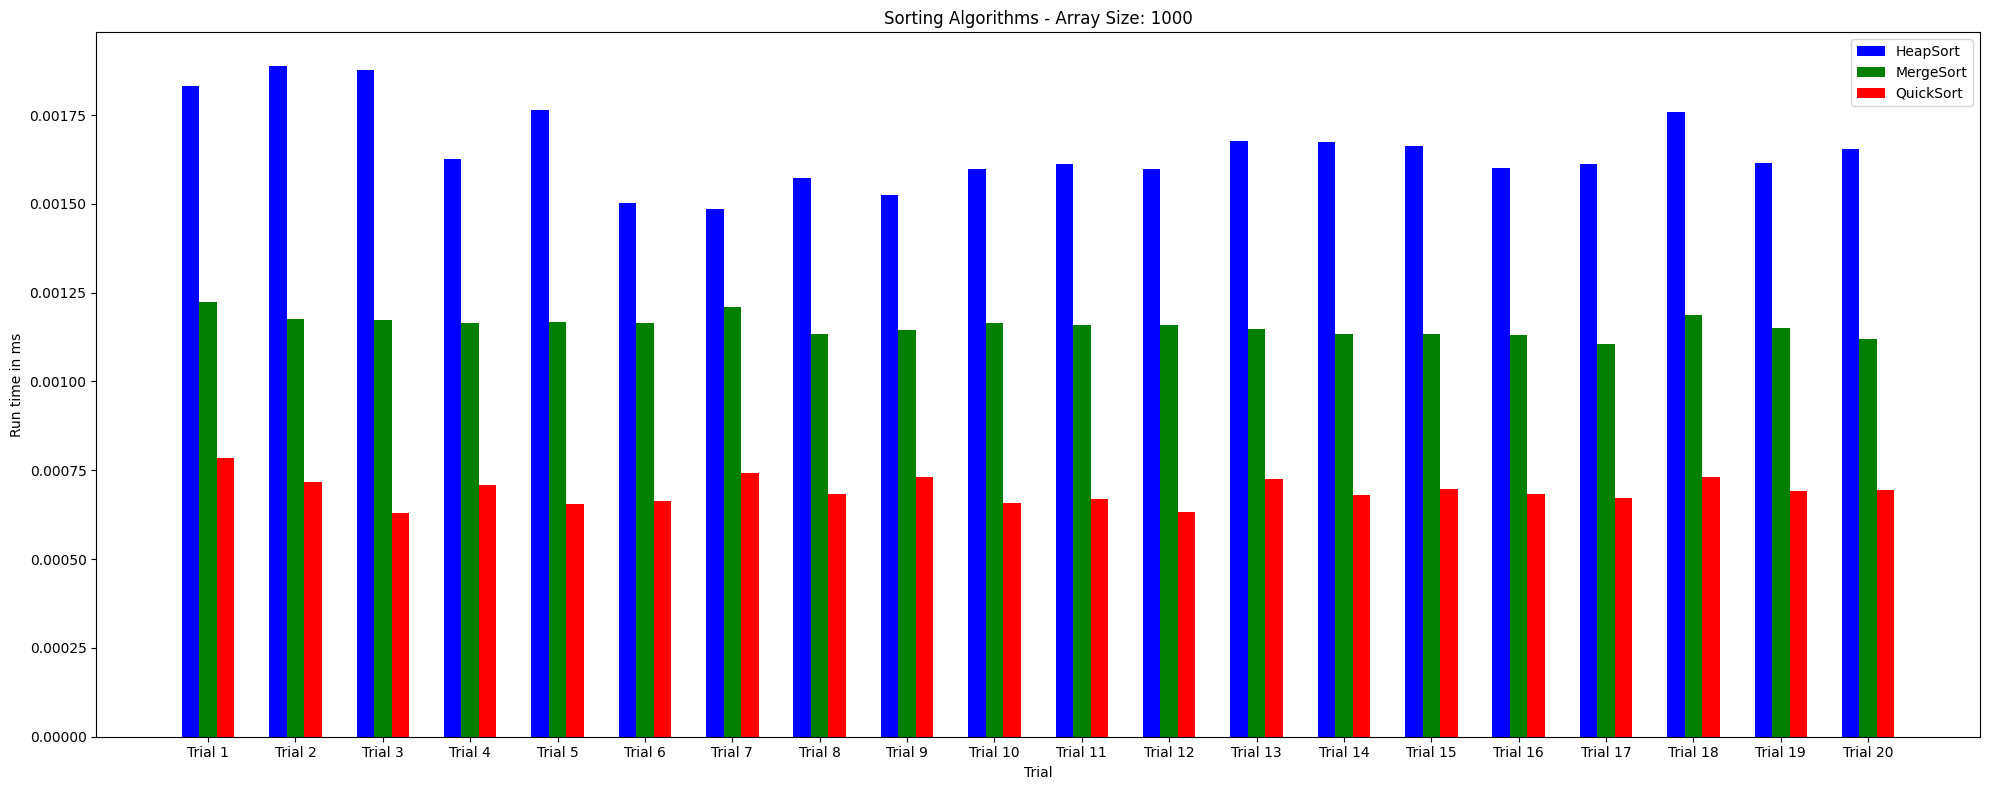

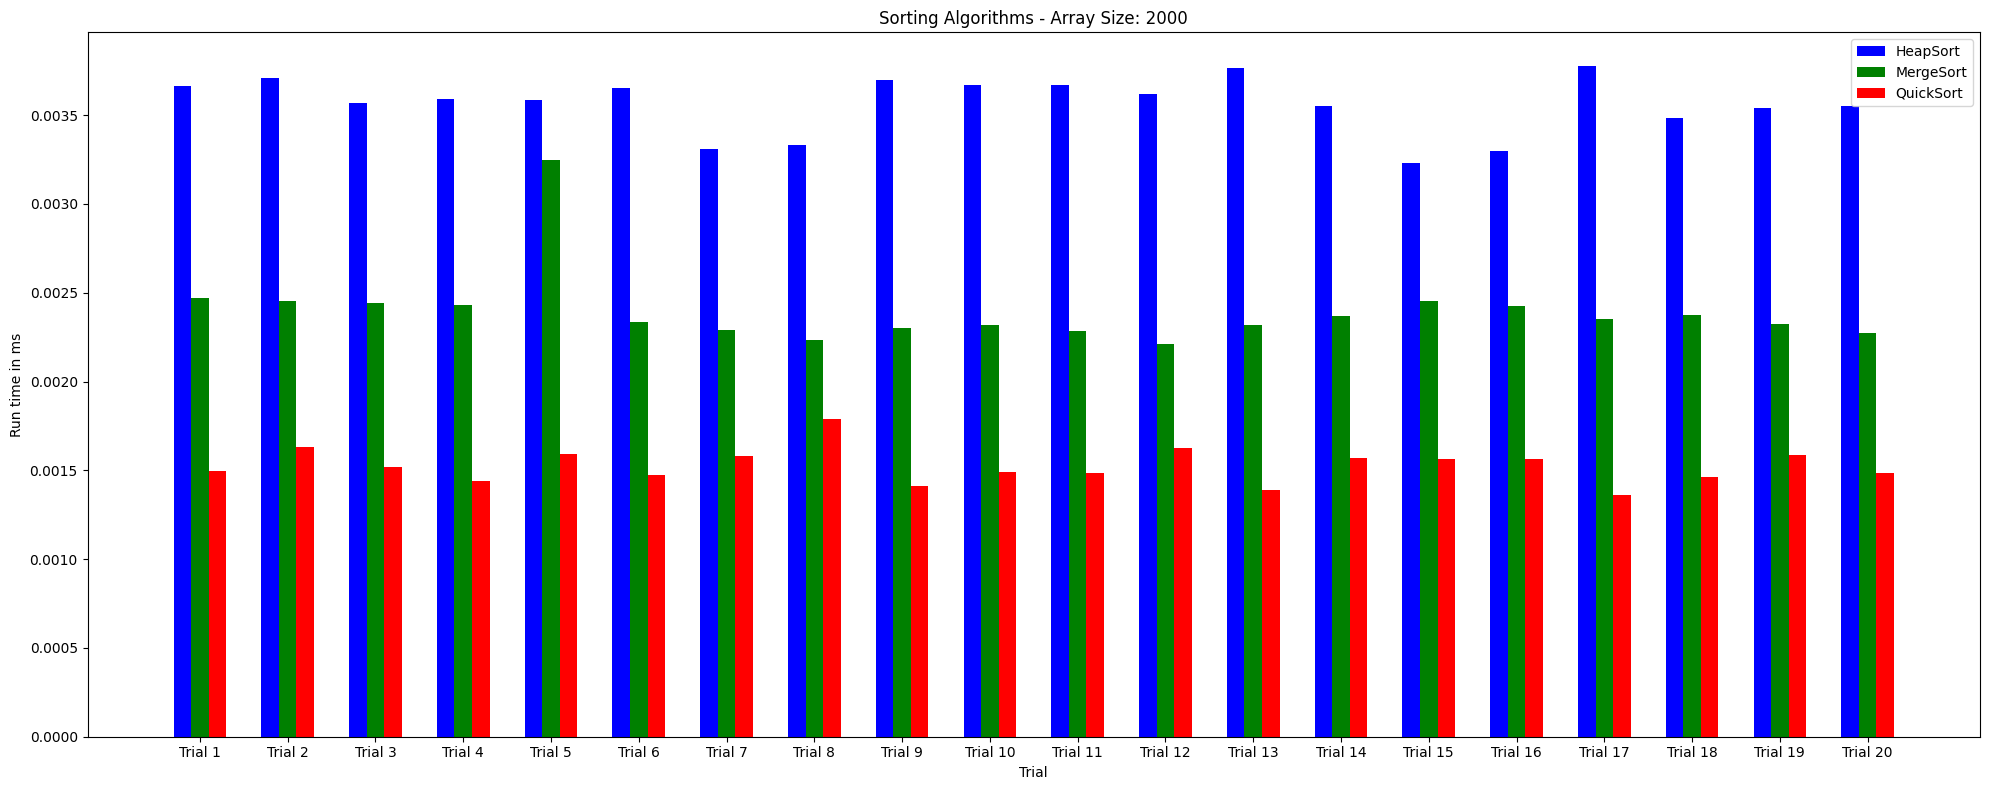

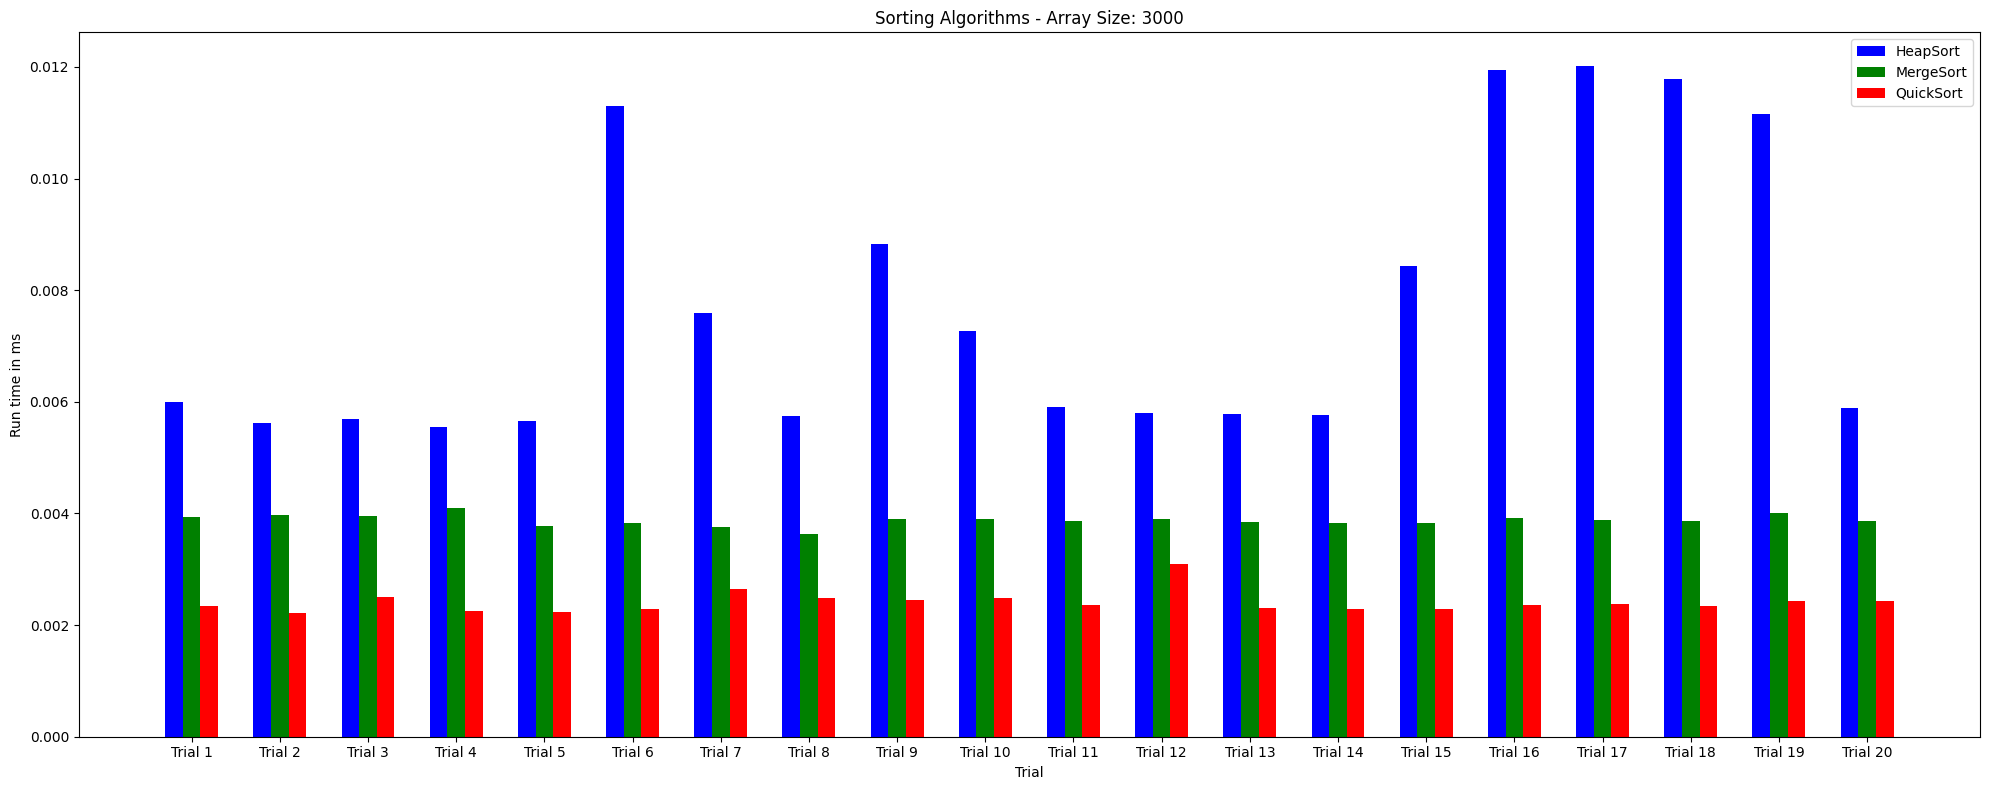

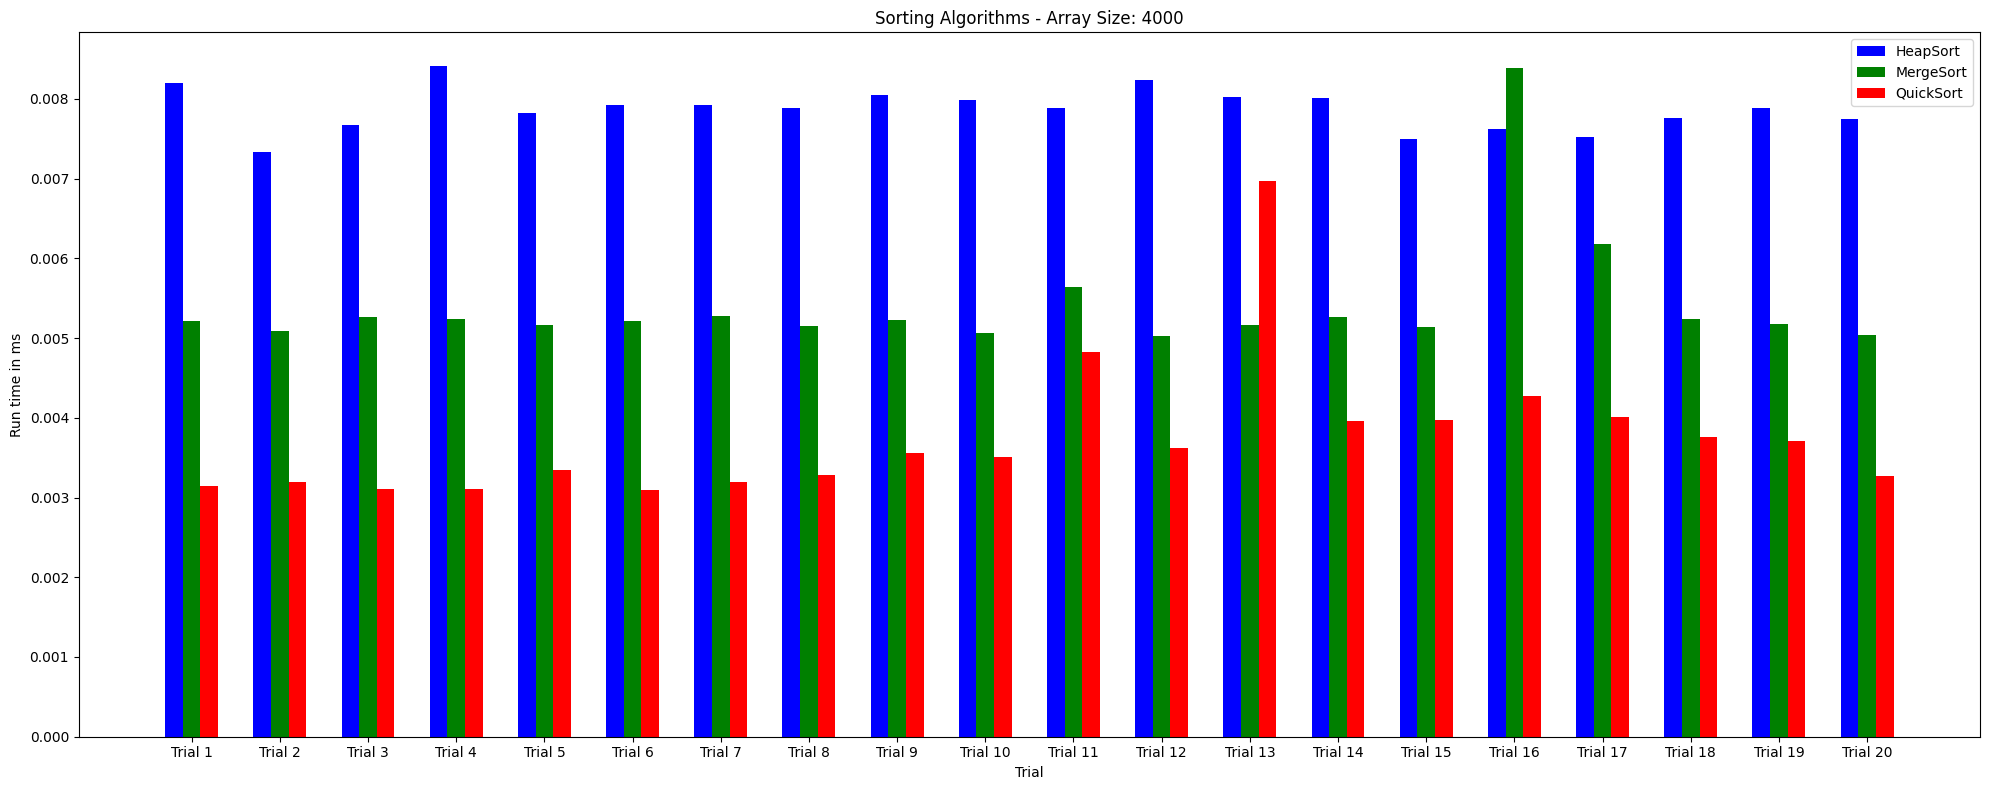

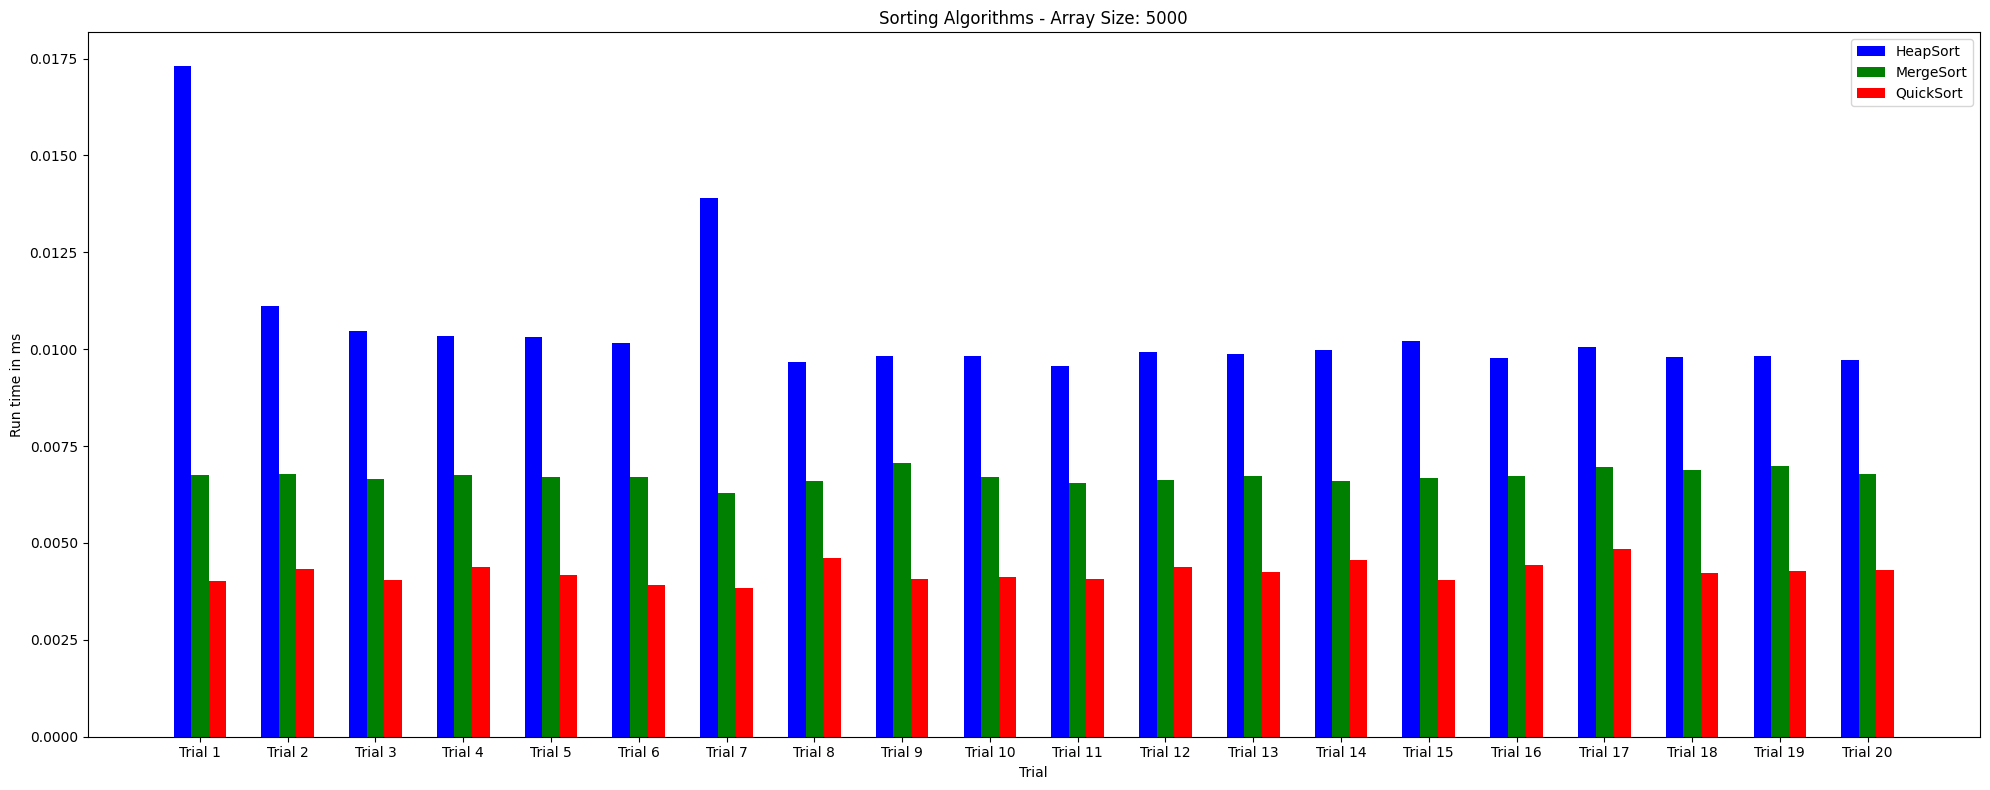

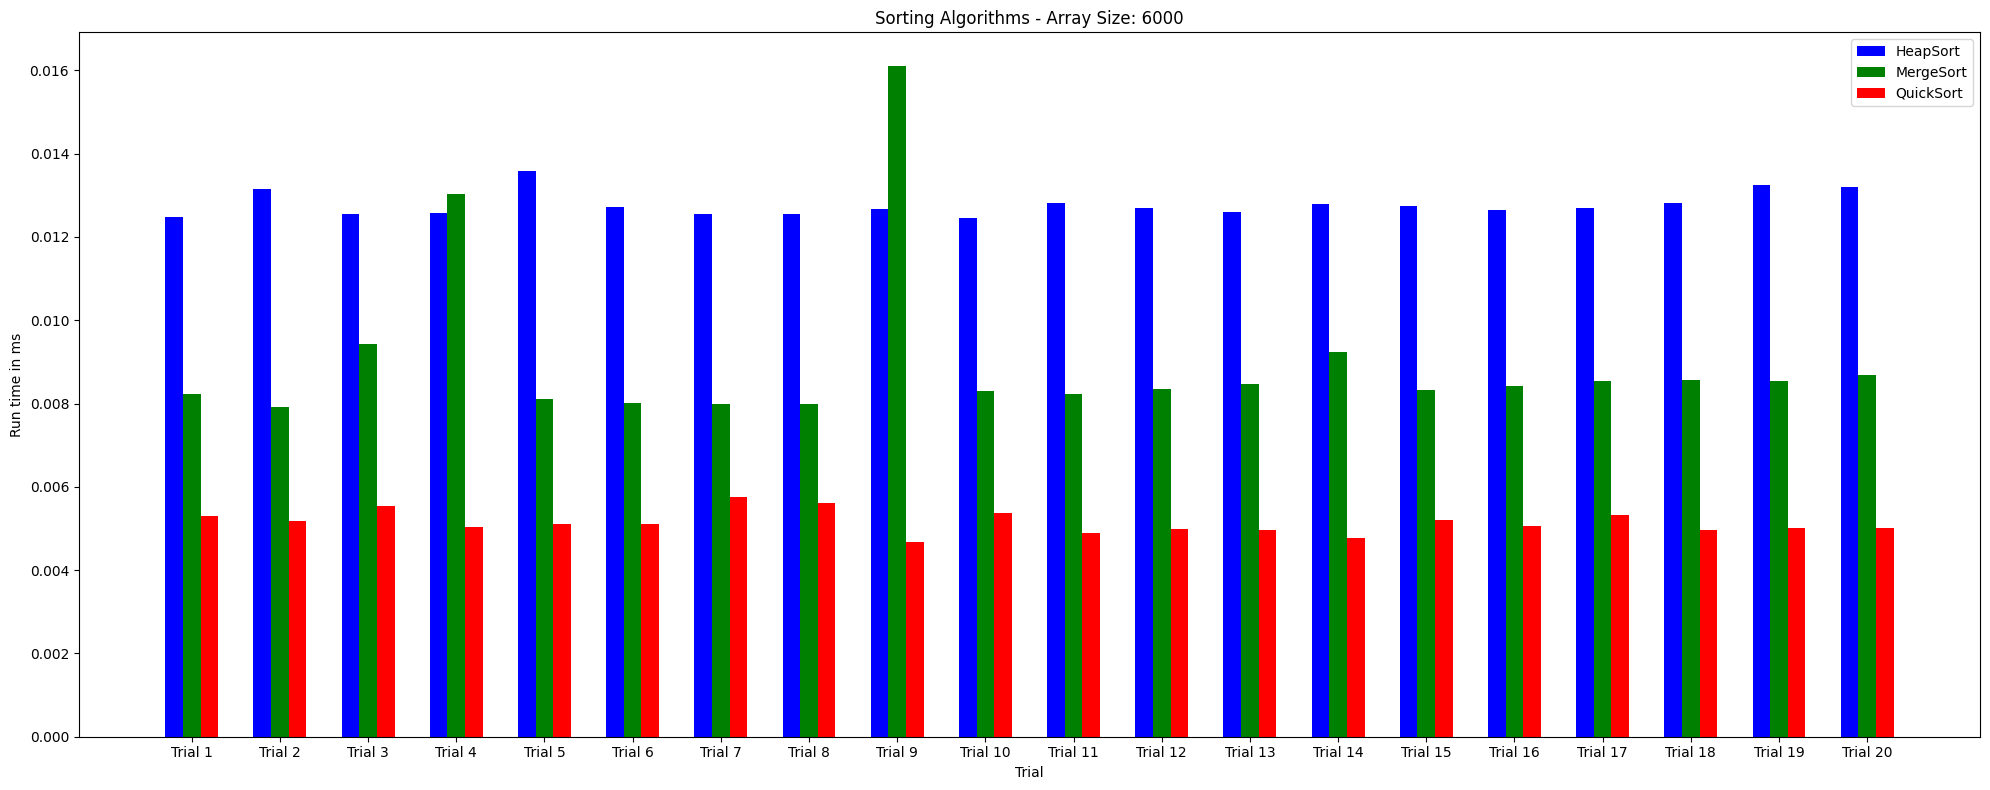

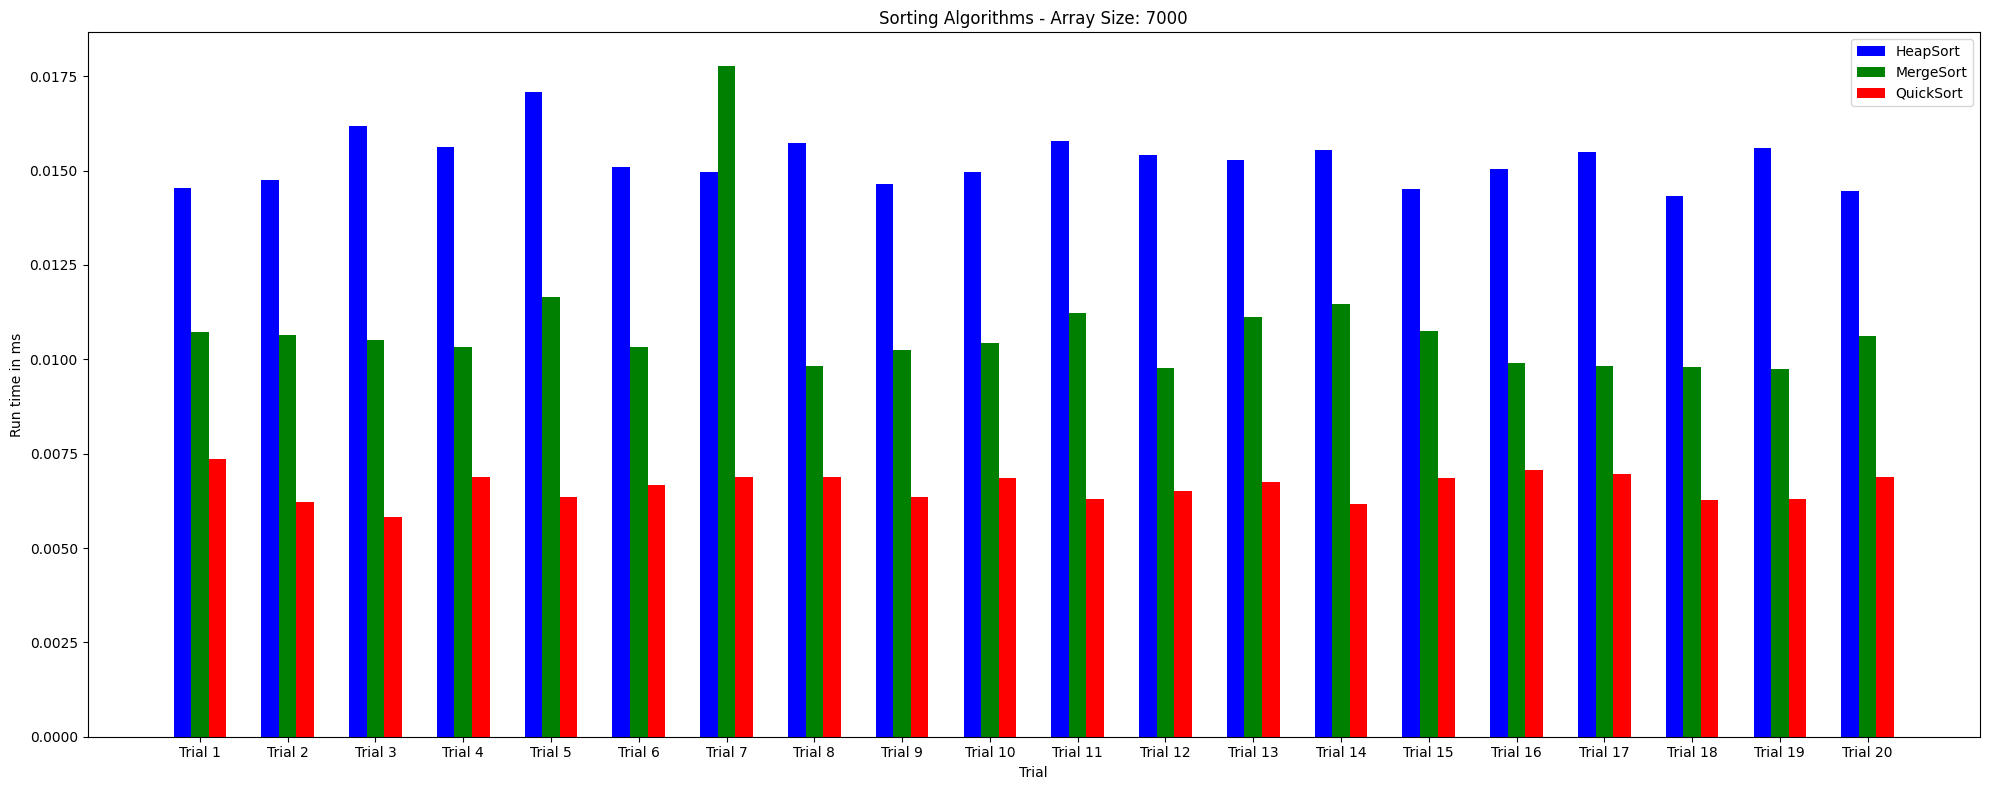

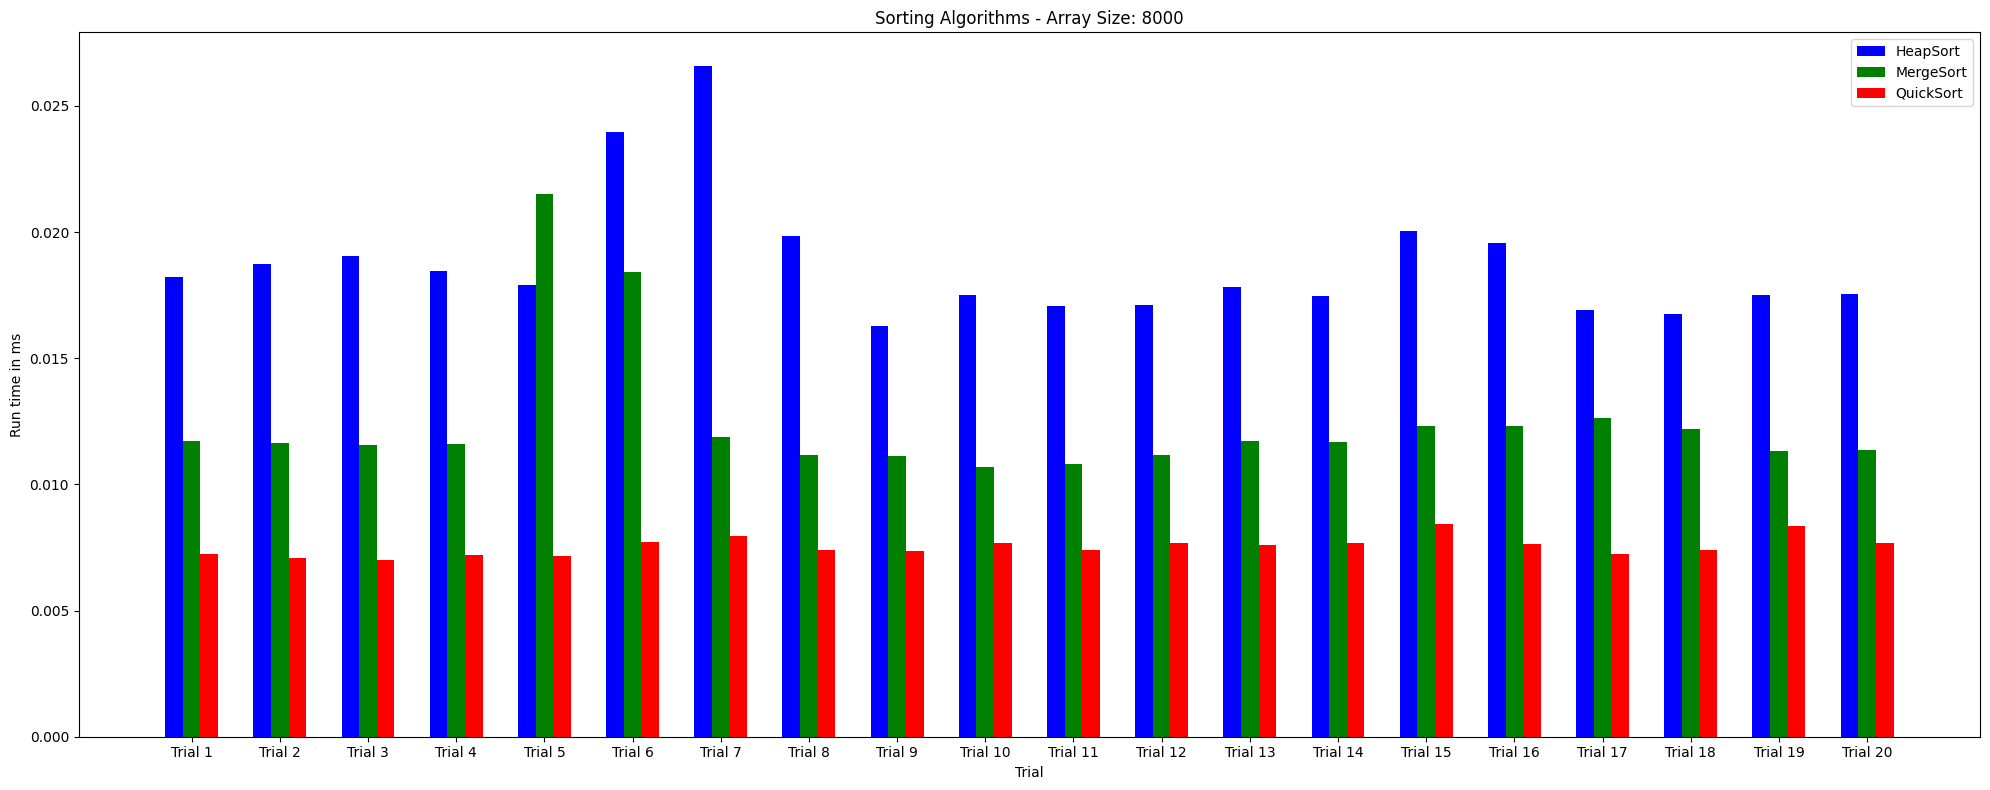

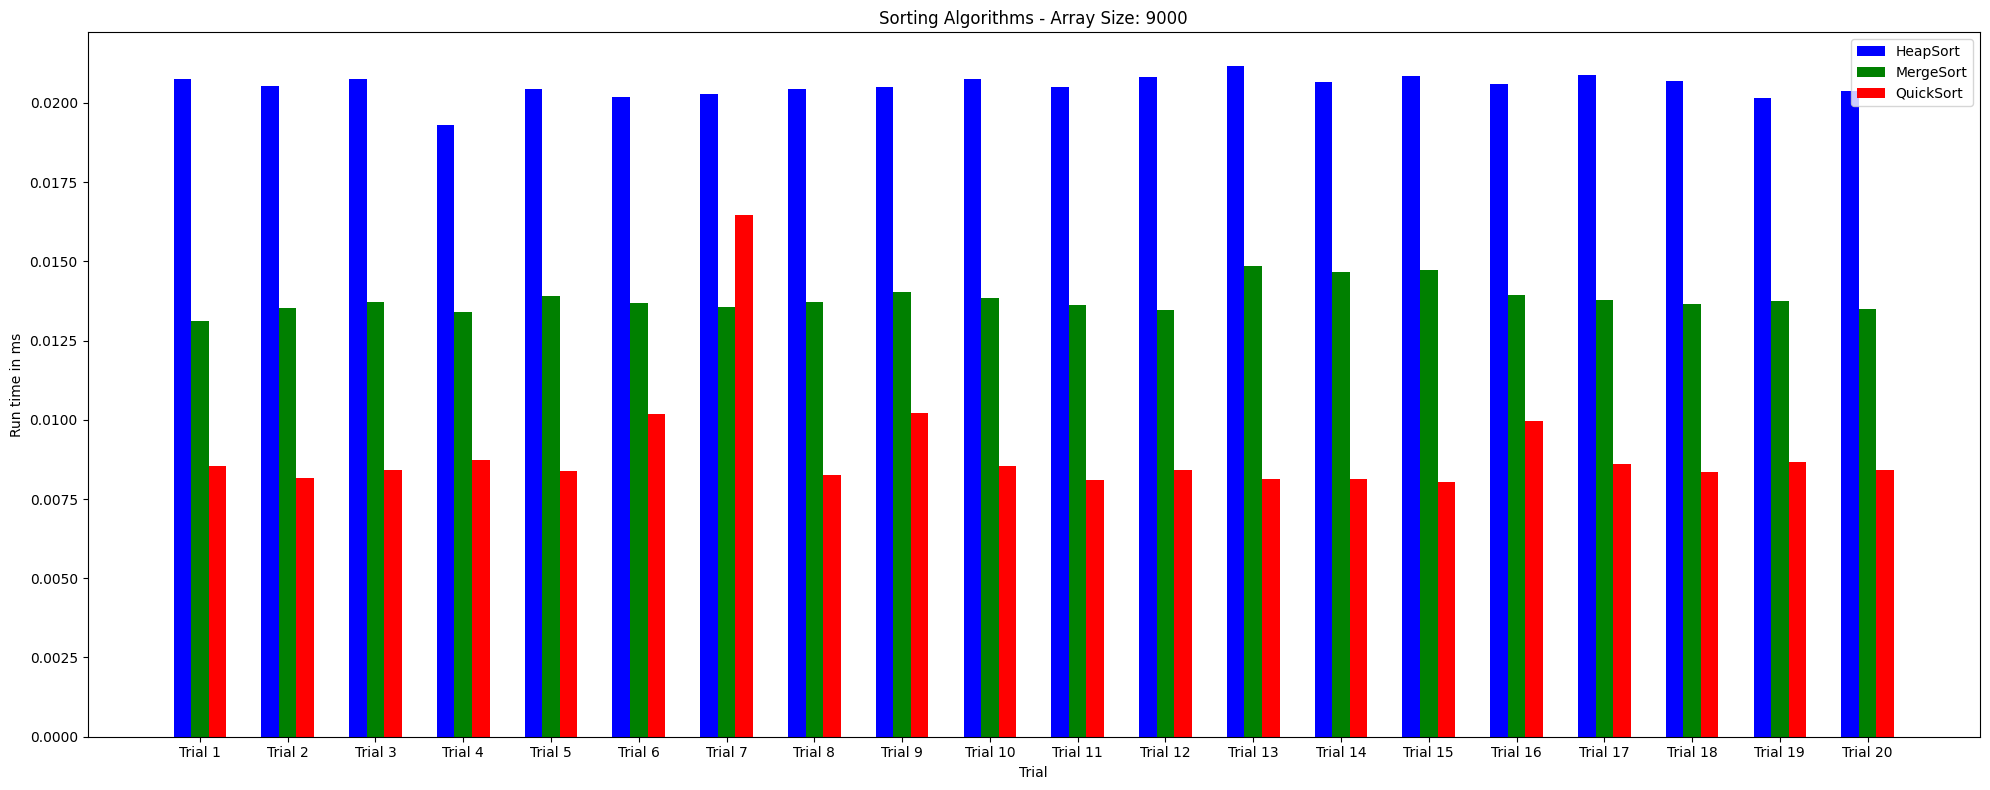

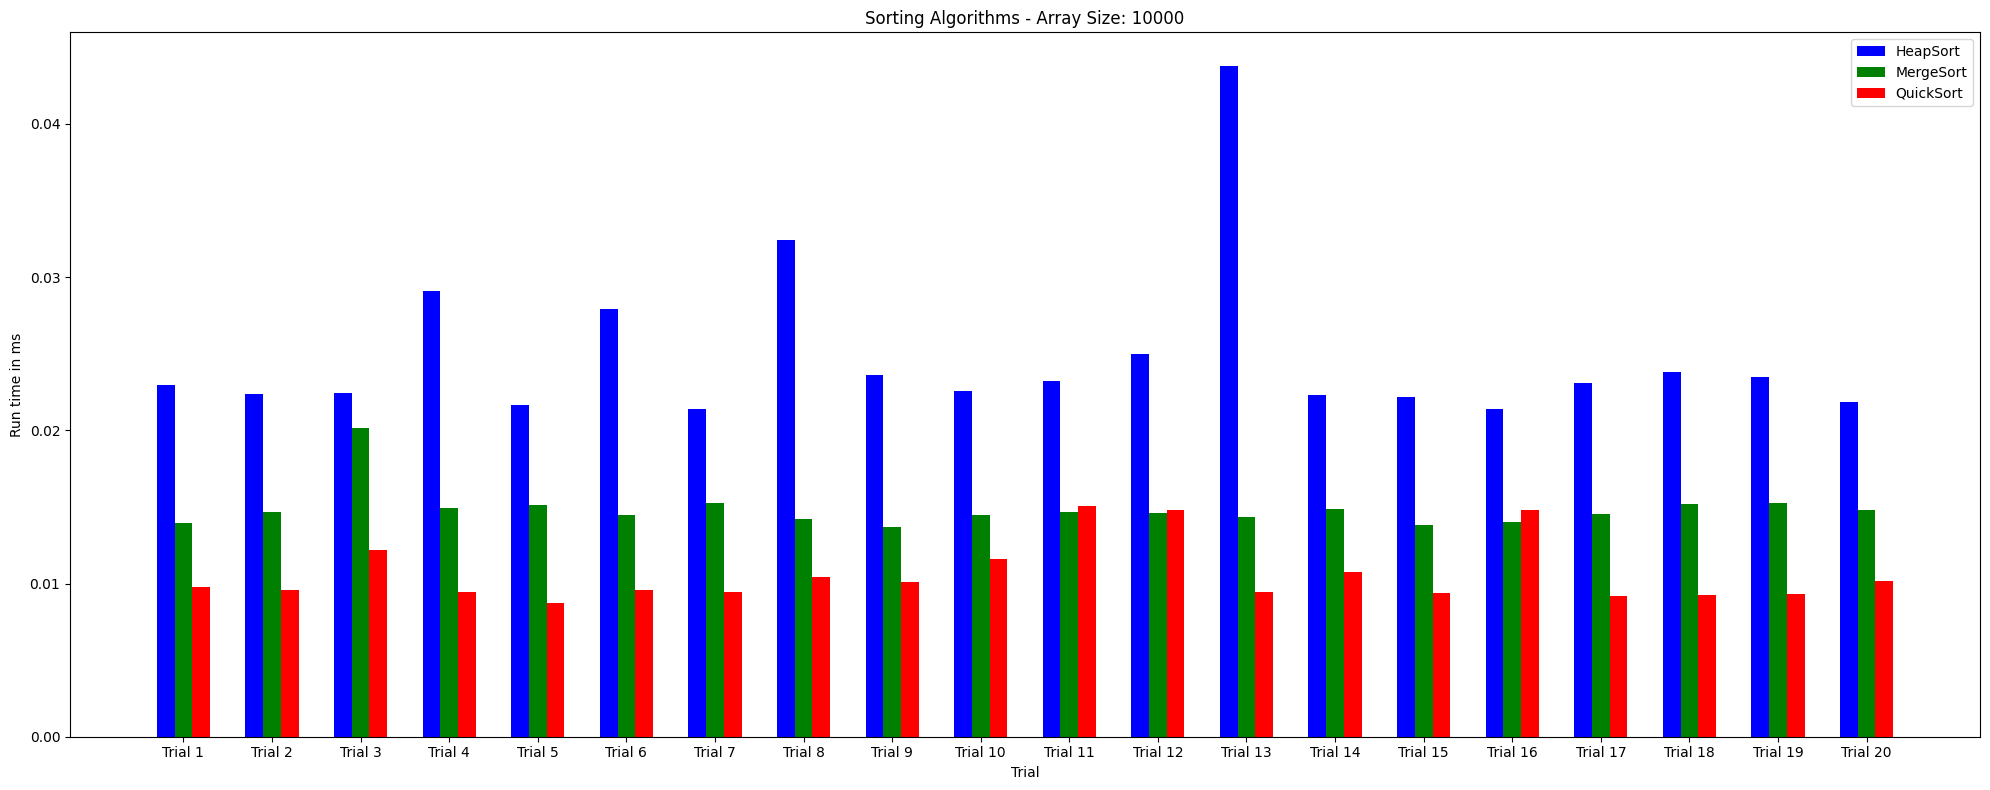

In [52]:
"""
This script benchmarks sorting algorithms by comparing their runtimes.

Functions:
- draw_plot_1(results, title): Plots the runtimes of different sorting algorithms.
- experiment(sort_method, size, num_trials): Runs a sorting algorithm multiple times and records the runtime for each trial.

Process:
1. Define array sizes and number of trials.
2. For each size, run each sorting algorithm 'num_trials' times.
3. Collect the runtimes and store them in 'alg_results'.
4. Plot the results using 'draw_plot_1' for each array size.
"""


def draw_plot_1(results, title):
    n_groups = len(results['QuickSort'])
    fig, ax = plt.subplots(figsize=(20, 8))

    bar_width = 0.2
    index = np.arange(n_groups)

    plt.bar(index - bar_width, results['HeapSort'], bar_width, color='blue', label='HeapSort')
    plt.bar(index, results['MergeSort'], bar_width, color='green', label='MergeSort')
    plt.bar(index + bar_width, results['QuickSort'], bar_width, color='red', label='QuickSort')
    
    plt.xlabel('Trial')
    plt.ylabel('Run time in ms')
    plt.title(title)
    plt.xticks(index, [f'Trial {i+1}' for i in range(n_groups)])
    plt.legend()

    plt.tight_layout()
    plt.show()

def experiment(sort_method, size, num_trials):
    trial_times = []
    for _ in range(num_trials):
        data = create_custom_list(size, 1000)
        trial_time = run_sorting_algorithm(sort_method, data.copy())
        trial_times.append(trial_time)
    return trial_times

array_sizes = [ 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
num_trials = 20
sorting_methods = {'HeapSort': heapSort, 'MergeSort': mergeSort, 'QuickSort': quickSort}
alg_results = {method: {size: [] for size in array_sizes} for method in sorting_methods}

for size in array_sizes:
    for method_name, sort_method in sorting_methods.items():
        alg_results[method_name][size] = experiment(sort_method, size, num_trials)

# Plot the results for each size
for size in array_sizes:
    results = {method: alg_results[method][size] for method in sorting_methods}
    draw_plot_1(results, f"Sorting Algorithms - Array Size: {size}")


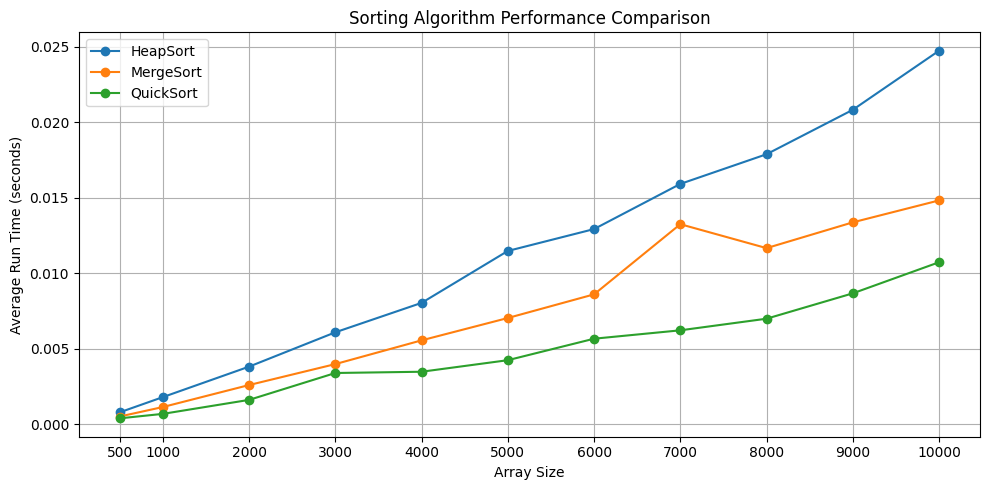

In [53]:
"""
This script analyzes and compares the performance of different sorting algorithms.

Functions:
- calculate_average_times(results): Calculates the average runtime for each algorithm over different array sizes.
- draw_line_graph(average_times, array_sizes): Plots a line graph of the average runtimes for each algorithm.

Process:
1. Set up array sizes, number of trials, and sorting algorithms (HeapSort, MergeSort, QuickSort).
2. For each array size and sorting method, generate an array, sort it, and record the runtime.
3. Calculate the average runtime for each algorithm and array size using 'calculate_average_times'.
4. Plot the average runtimes against array sizes using 'draw_line_graph'.
"""



def calculate_average_times(results):
    average_times = {}
    for alg_name, times in results.items():
        average_times[alg_name] = [np.mean(time_list) for time_list in times.values()]
    return average_times

def draw_line_graph(average_times, array_sizes):
    plt.figure(figsize=(10, 5))
    for alg_name, times in average_times.items():
        plt.plot(array_sizes, times, marker='o', label=alg_name)
    plt.xlabel('Array Size')
    plt.ylabel('Average Run Time (seconds)')
    plt.title('Sorting Algorithm Performance Comparison')
    plt.xticks(array_sizes)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main execution
array_sizes = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
num_trials = 10
sorting_methods = {'HeapSort': heapSort, 'MergeSort': mergeSort, 'QuickSort': quickSort}
alg_results = {method: {} for method in sorting_methods}

# Running the experiment
for size in array_sizes:
    for method_name, sort_method in sorting_methods.items():
        run_times = []
        for _ in range(num_trials):
            data = create_custom_list(size, 1000)
            time_taken = run_sorting_algorithm(sort_method, data.copy())
            run_times.append(time_taken)
        alg_results[method_name][size] = run_times

# Calculate average run times
average_times = calculate_average_times(alg_results)

# Draw the line graph
draw_line_graph(average_times, array_sizes)

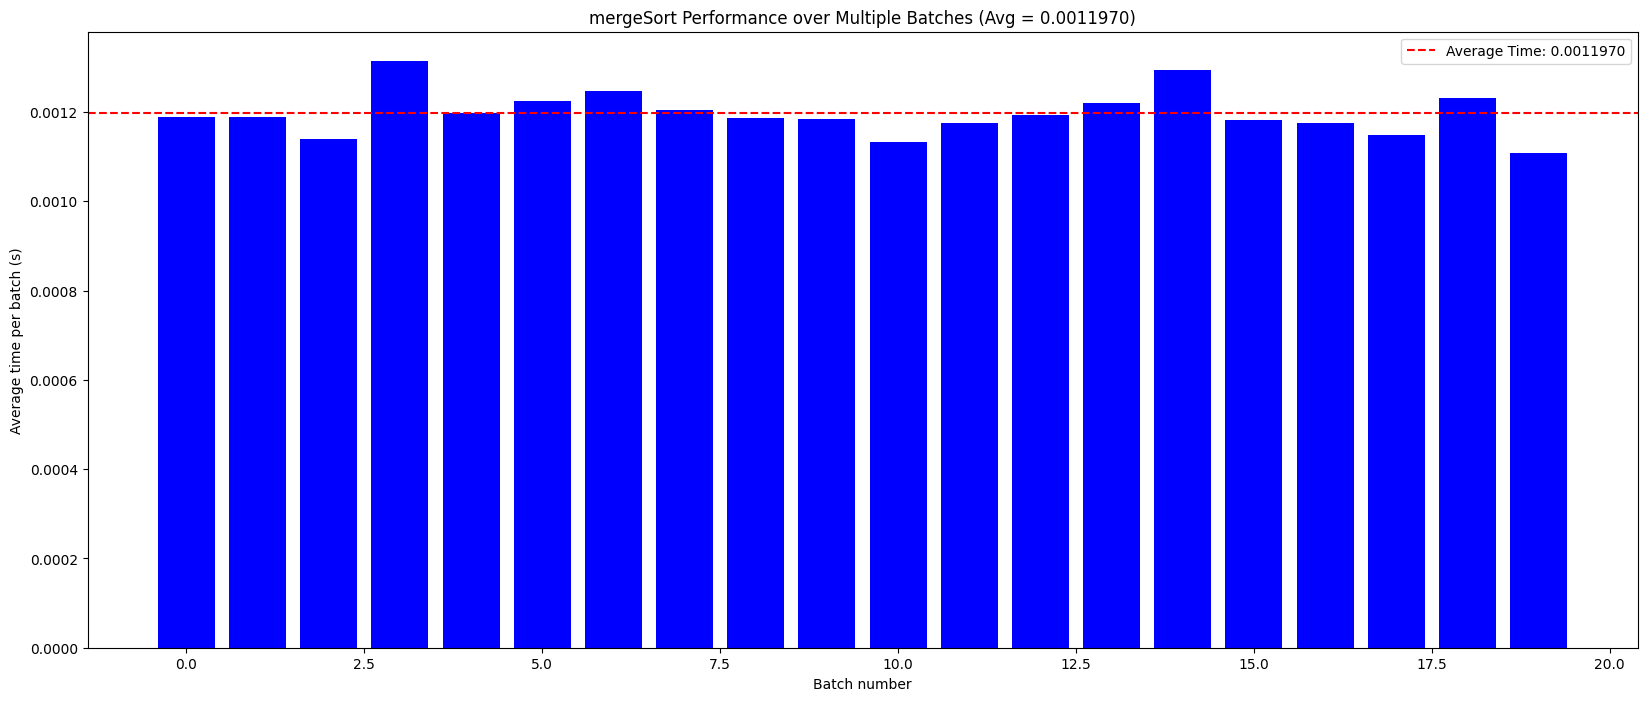

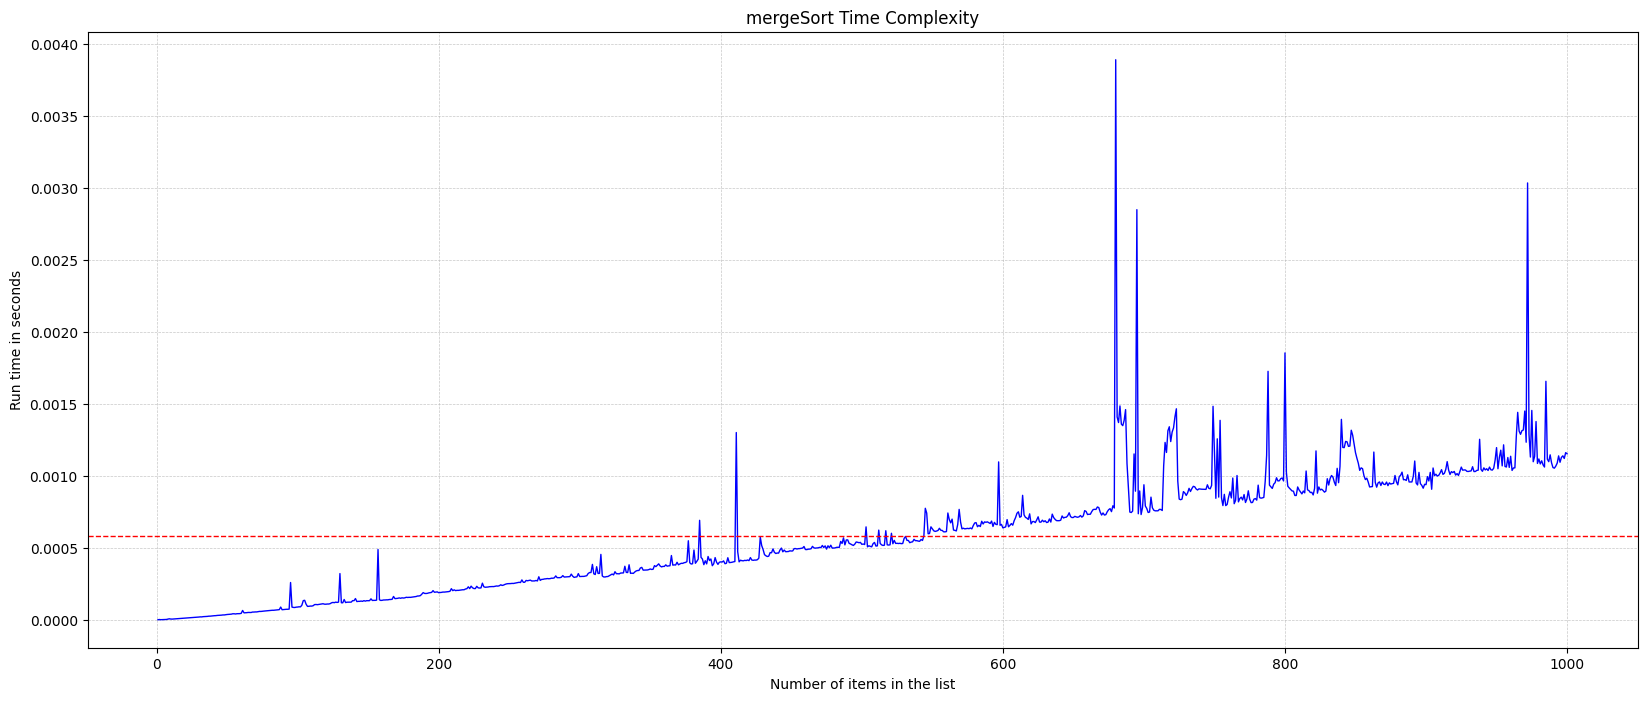

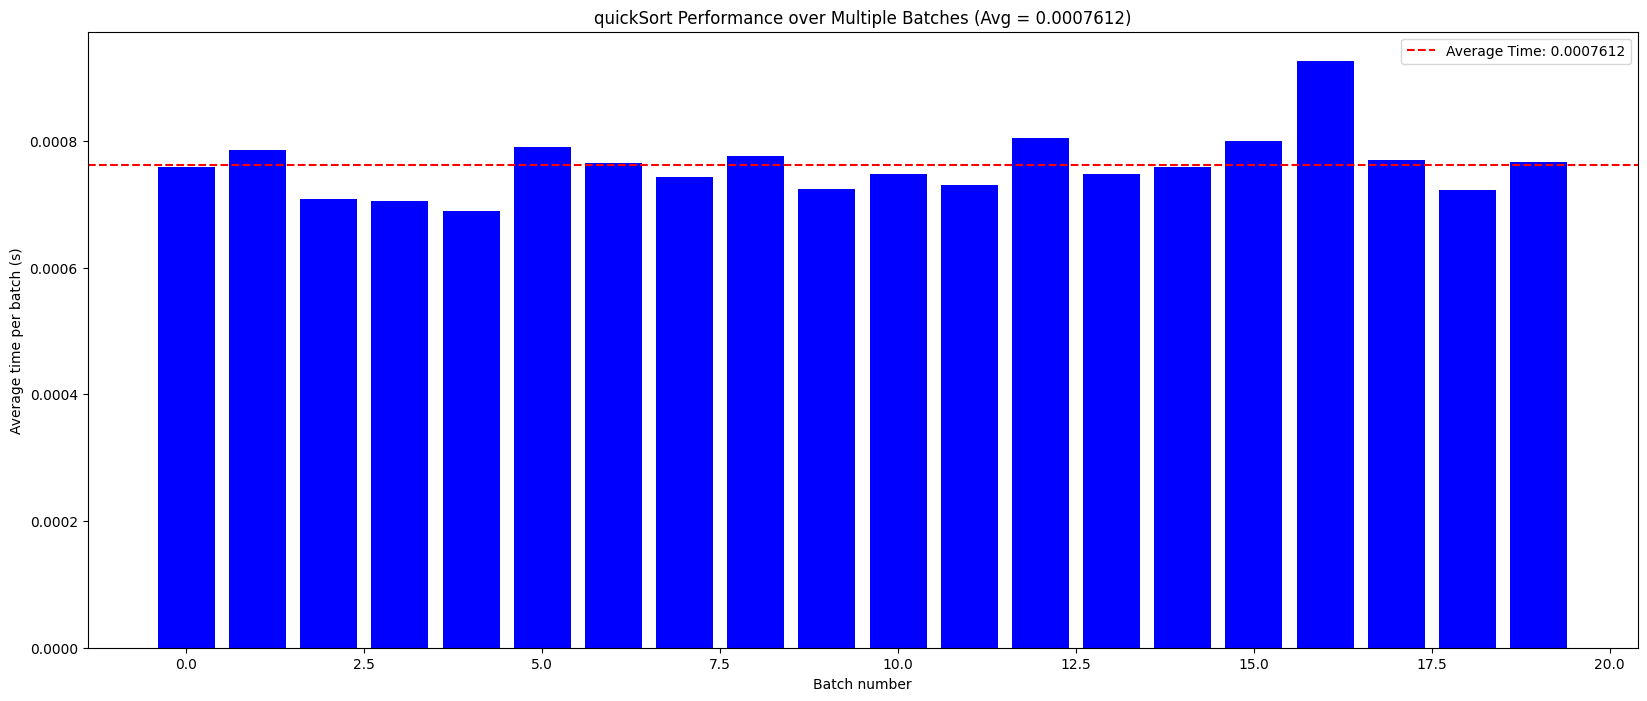

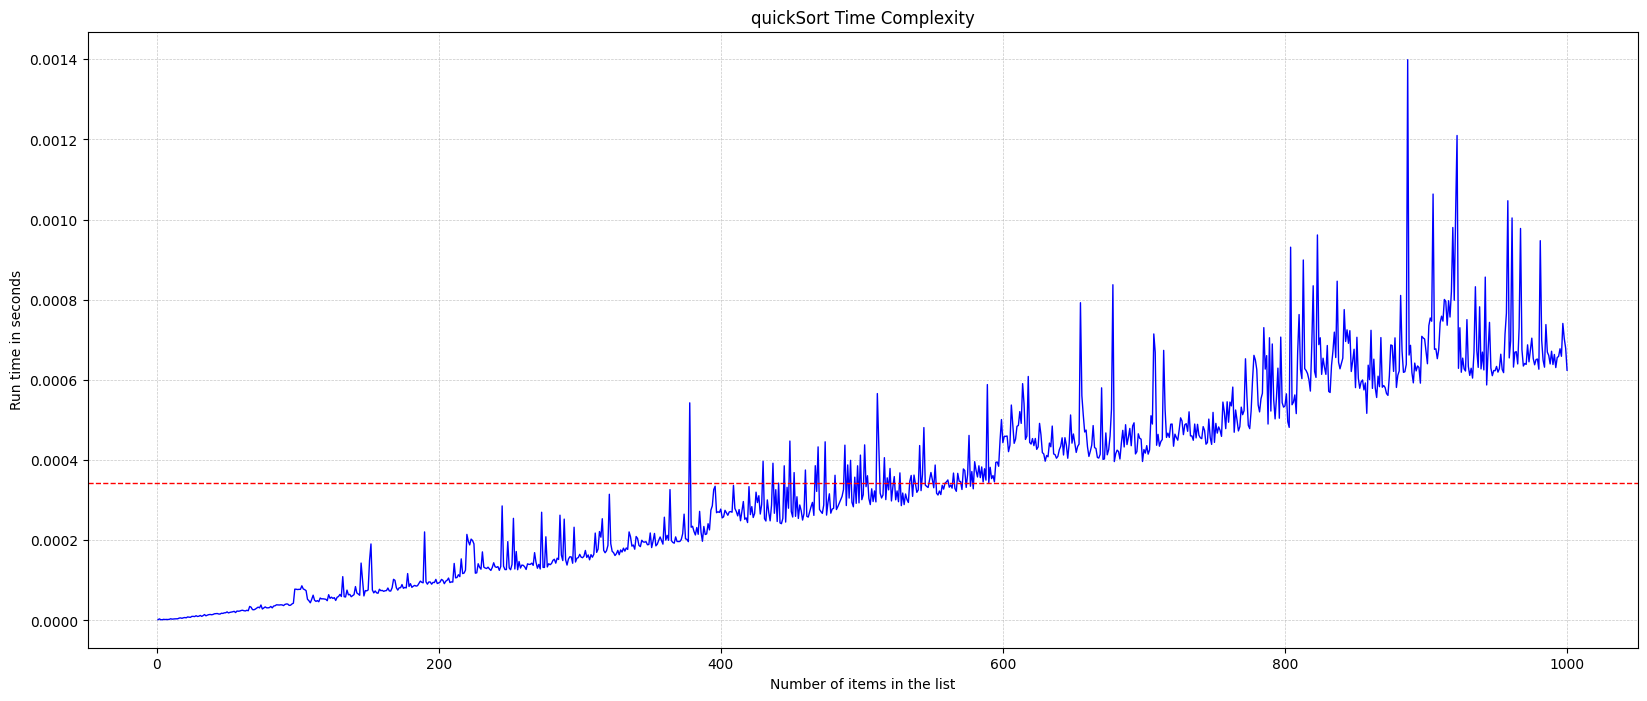

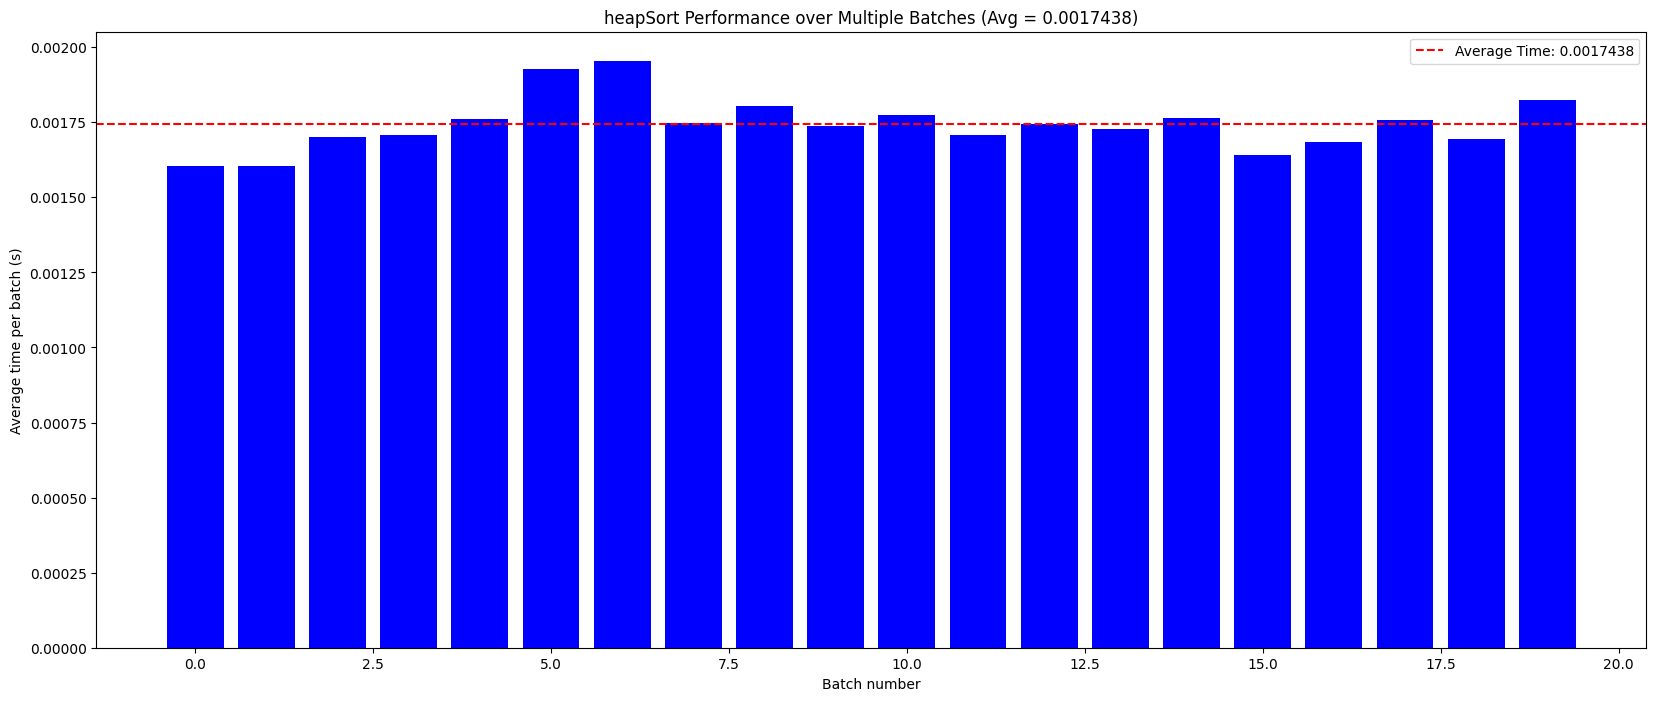

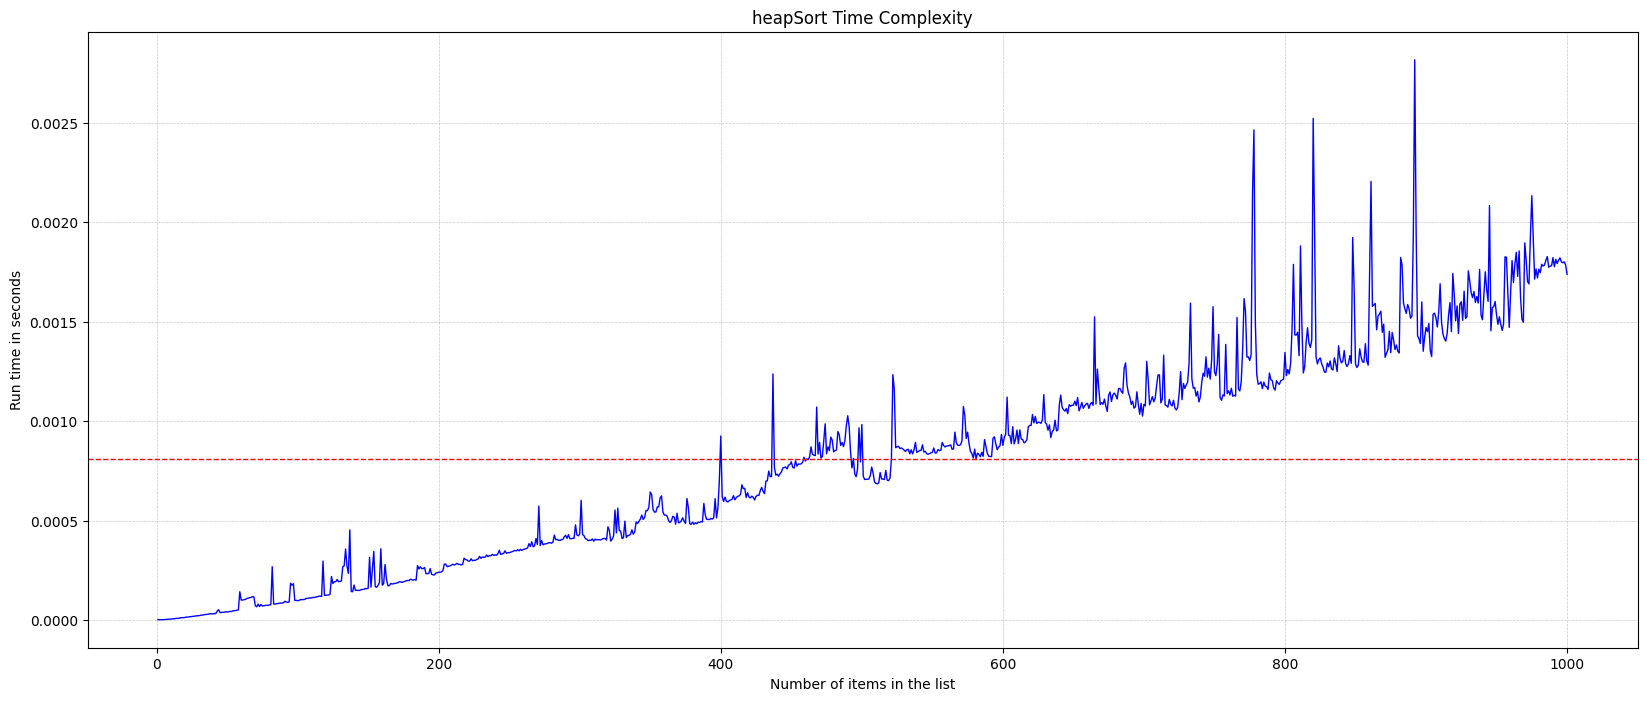

In [54]:
#I created a new draw_plot inorder to show sorting algorithms in different plots
"""
This script performs detailed performance analysis on sorting algorithms by plotting their runtimes.

Functions:
- draw_plot_2(timings, algorithm_name): Plots a bar chart of run times for multiple batches of sorting, with an average time line.
- draw_line_chart(x, y, title, avg_time): Plots a line chart of run times against list sizes, with an average time line.
- sort_experiment(sort_method, N, list_length, max_value): Runs the sorting algorithm multiple times on lists of fixed length and plots the results.
- size_experiment(sort_method, max_list_size, max_value): Runs the sorting algorithm on lists of increasing sizes and plots the results.

Process:
1. Define the total number of elements (N), list length for sort_experiment, and the maximum value for list elements.
2. Run 'sort_experiment' to see how the sorting algorithm performs over multiple batches of a fixed size.
3. Run 'size_experiment' to analyze how the sorting algorithm's performance scales with the size of the input.

"""






def draw_plot_2(timings, algorithm_name):
    avg_time = np.mean(timings)
    plt.figure(figsize=(20, 8))
    plt.bar(range(len(timings)), timings, color='blue')
    plt.axhline(y=avg_time, color='red', linestyle='dashed', label=f'Average Time: {avg_time:.7f}')
    plt.xlabel('Batch number')
    plt.ylabel('Average time per batch (s)')
    plt.title(f'{algorithm_name} Performance over Multiple Batches (Avg = {avg_time:.7f})')
    plt.legend()
    plt.show()

def draw_line_chart(x, y, title, avg_time):
    plt.figure(figsize=(20, 8))
    
   
    plt.plot(x, y, color='blue', linewidth=1.0) 

    plt.axhline(y=avg_time, color='red', linestyle='dashed', linewidth=1.0, label=f'Average Time: {avg_time:.7f}')
    
    plt.xlabel('Number of items in the list')
    plt.ylabel('Run time in seconds')  
    plt.title(title)
    
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    plt.show()

def sort_experiment(sort_method, N, list_length, max_value):
    timings = []

    batches = N // 500
    for _ in range(batches):
        batch_timings = []
        for _ in range(100):
            custom_list = create_custom_list(list_length, max_value)
            start_time = time.time()
            if sort_method.__name__ == 'quickSort':
                sort_method(custom_list, 0, len(custom_list) - 1)
            else:
                sort_method(custom_list)
            end_time = time.time()
            execution_time = end_time - start_time
            batch_timings.append(execution_time)
        
        average_time = np.mean(batch_timings)
        timings.append(average_time)
    
    draw_plot_2(timings, sort_method.__name__)

def size_experiment(sort_method, max_list_size, max_value):
    list_sizes = list(range(1, max_list_size + 1))
    timings = []
    for size in list_sizes:
        custom_list = create_custom_list(size, max_value)
        start_time = time.time()
        if sort_method.__name__ == 'quickSort':
            sort_method(custom_list, 0, len(custom_list) - 1)
        else:
            sort_method(custom_list)
        end_time = time.time()
        execution_time = end_time - start_time
        timings.append(execution_time)
    
    avg_time = np.mean(timings)
    draw_line_chart(list_sizes, timings, f'{sort_method.__name__} Time Complexity', avg_time)

# Main execution
N = 10000
list_length = 1000
max_value = 1000

# Run experiments for each sorting method
for sort_method in [mergeSort, quickSort, heapSort]:
    sort_experiment(sort_method, N, list_length, max_value)
    size_experiment(sort_method, 1000, max_value)

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---
---

### PART E

E1. In previous experiments you also saw that not all algorithms are suitable for all scenarios. For instance, Merge Sort is better than Quick sort for certain situations. In this section, design a experiment to compare the scenarios where Merge Sort is better/worse than Quick Sort. You can use the traditional version of Merge Sort or use improved version ( maybe via recursion) to compare this performance.


### Experiment 1: 

#### Basics:
- **Algorithms**: Merge Sort, Quick Sort
- **Data Size**: We used arrays with 1000 elements each.
- Test Scenarios: 
  - Same Data: To check how the algorithms handle identical data.
  - Already Sorted (Ascending): To see their performance on data that's in ascending order.
  - Already Sorted (Descending): To test how they deal with data sorted in descending order.
  - Mostly Sorted: To understand how they manage data that's just a bit mixed up.
- **Repeated Tests**: We ran each scenario 10 times to make sure our results were solid.

 Displaying Results
 Bar charts are used to show the result of Merge sort and quick sort. 

### Conclusion:
  - Merge Sort was consistently reliable, performing well no matter the type of data.
  - Quick Sort's results varied more, doing great in some scenarios but not as well in others, like with reverse-ordered or identical data.
  - Merge Sort outperformed Quick Sort with pre-sorted, nearly sorted
  - The consistent and predictable nature of Merge Sort makes it a safer bet for data that's partially sorted or uniform.
  - Choosing between Merge Sort and Quick Sort should depend on what your data looks like. 
  - Merge Sort is usually a smarter choice for data that's reverse-sorted, uniform, or nearly sorted, thanks to its steady performance.
  - On the other hand, Quick Sort might be better for data that's randomly mixed or mostly sorted, despite some inconsistencies.


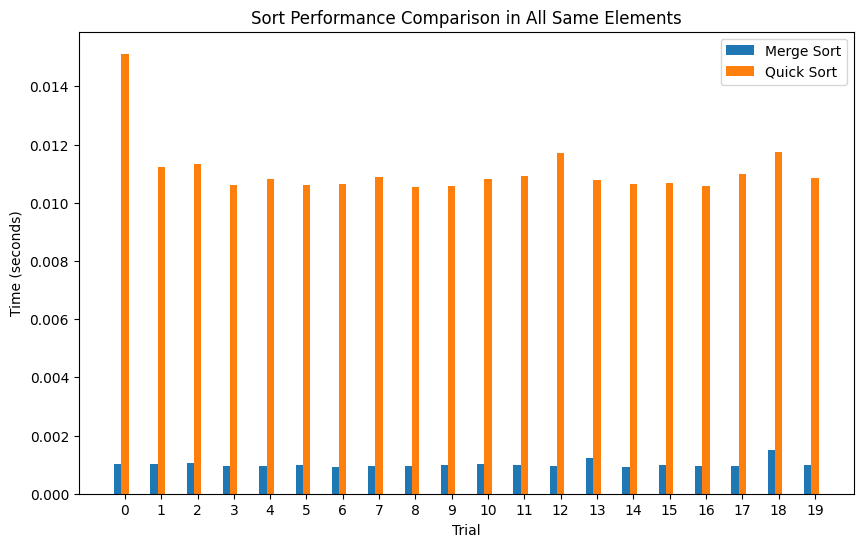

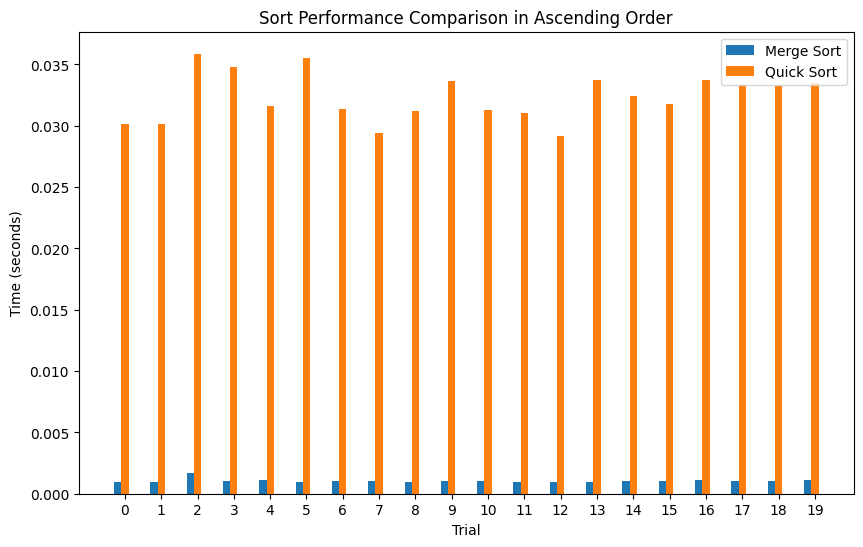

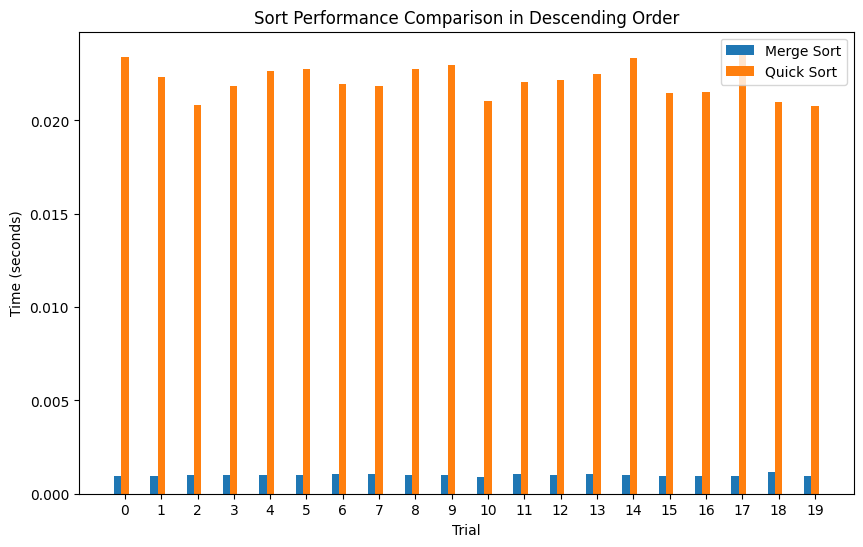

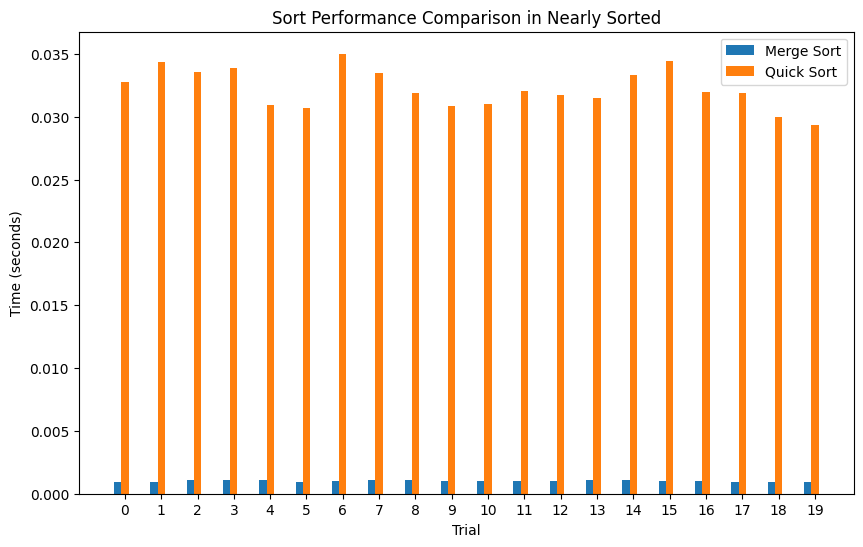

In [55]:
"""
This script evaluates the performance of Merge Sort and Quick Sort algorithms under different data scenarios.

Functions:
- create_scenario_array(size, scenario): Generates an array based on the given scenario ('All Same Elements', 'Ascending Order', 'Descending Order', 'Nearly Sorted').
- run_experiment(array_size, num_trials, scenario): Runs both sorting algorithms multiple times on arrays created for a specific scenario and records their run times.
- plot_results(merge_sort_times, quick_sort_times, scenario): Plots a bar chart comparing the run times of Merge Sort and Quick Sort for each trial.

Process:
1. Define array size, number of trials, and scenarios to test.
2. For each scenario, generate an array and run both sorting algorithms multiple times.
3. Record the sorting times and plot the results using 'plot_results'.

"""


def create_scenario_array(size, scenario):
    if scenario == 'All Same Elements':
        return [1] * size
    elif scenario == 'Ascending Order':
        return list(range(size))  # Workaround for list(range(size))
    elif scenario == 'Descending Order':
        return [i for i in range(size, 0, -1)]  # Workaround for list(range(size, 0, -1))
    elif scenario == 'Nearly Sorted':
        arr = [i for i in range(size)]  # Workaround
        arr[-1], arr[-2] = arr[-2], arr[-1]  # Swap last two elements
        return arr
    else:
        raise ValueError(f"Unknown scenario: {scenario}")


def run_experiment(array_size, num_trials, scenario):
    merge_sort_times = []
    quick_sort_times = []
    for _ in range(num_trials):
        data = create_scenario_array(array_size, scenario)
        merge_sort_times.append(run_sorting_algorithm(mergeSort, data.copy()))
        quick_sort_times.append(run_sorting_algorithm(quickSort, data.copy()))
    
    return merge_sort_times, quick_sort_times

def plot_results(merge_sort_times, quick_sort_times, scenario):
    x = np.arange(len(merge_sort_times))

    plt.figure(figsize=(10, 6))
    plt.bar(x - 0.2, merge_sort_times, width=0.2, label='Merge Sort')
    plt.bar(x, quick_sort_times, width=0.2, label='Quick Sort')
    plt.xlabel('Trial')
    plt.ylabel('Time (seconds)')
    plt.title(f'Sort Performance Comparison in {scenario}')
    plt.xticks(x)
    plt.legend()
    plt.show()

# Main execution
array_size = 1000
num_trials = 20
scenarios = ['All Same Elements', 'Ascending Order', 'Descending Order', 'Nearly Sorted']

for scenario in scenarios:
    merge_sort_times, quick_sort_times = run_experiment(array_size, num_trials, scenario)
    plot_results(merge_sort_times, quick_sort_times, scenario)

In this section, provide a detailed outline of:
- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.

---

E2. Recall that on the first day of class I asked which two algorithms have similar complexity - Merge Sort and Quick Sort under (O(nlogn)) are likely to perform similar under average cases. However, under worst case, the complexity of quick sort is much worse (O(n^2). Design an experiment to show this behavior. Plot this behavior on a bar/line chart. 

Next, count the number of "swaps" after which Quick sort starts behaving comparable to Merge sort. 

HINT: This will be a threshold at which the quick sort algorithm picks up again.


# Simplified Summary of Sorting Algorithm Tests

## Experiment Overview:
We focused on how fast they sort data and how Quick Sort handles swapping elements, aiming to figure out when Quick Sort works as well as or better than Merge Sort.

### Experiment 2:

#### Setup
- **Algorithms**: Merge Sort and a version of Quick Sort that counts swaps.
- **Array Sizes**: 100, 500, and 1000 items.
- **Scenarios**: 
  - **Best Case**: Arrays already in order.
  - **Average Case**: Arrays with numbers randomly mixed.
  - **Worst Case**: Arrays sorted in reverse, which makes Quick Sort do more swaps.
- **Repeated Trials**: We ran each test 10 times to make sure our findings were solid.

Tracking swaps in Quick Sort helps us understand how hard it's working to sort the array. This gives us a good idea of its efficiency, particularly how it manages different types of data and the effort involved in rearranging items.

### Showing the Results
- **Time Taken**: We used line graphs to compare how long Merge Sort and Quick Sort took to sort the data under each condition and array size.
- **Swap Analysis**: We also looked closely at how many swaps Quick Sort made, giving us more insight into how it performs.

We double-checked the swap counting by running Quick Sort on various lists in controlled tests to make sure it was counting right.

### Conclusion:
- **Best Case**: Quick Sort wasn't as efficient as Merge Sort with already sorted data, based on the time taken and swap numbers.
- **Average Case**: Quick Sort was pretty efficient with randomly mixed data, especially noticeable in the first test with 100 items, matching Merge Sort's performance with 278 swaps.
- **Worst Case**: Quick Sort struggled with data in reverse order, which made it swap a lot and work less efficiently.
- The tests show it's crucial to match the sorting algorithm to the type of data you have. Quick Sort is great with random data but not as good when data is in reverse order because of the extra work in swapping elements.
- These findings remind us to think about both speed and the work involved (like swaps) when choosing a sorting algorithm for specific data and situations.
- Knowing how swap numbers affect Quick Sort's performance helps us decide when it's the best choice and when another method, like Merge Sort, might be more consistent.


In [56]:
#This quick sort implementation has number of swaps as a parameter

def quickSort_2(array, low, high, count_swaps):
    if low < high:
        pivot, swaps = partition(array, low, high)
        count_swaps[0] += swaps
        quickSort_2(array, low, pivot - 1, count_swaps)
        quickSort_2(array, pivot + 1, high, count_swaps)
    return count_swaps[0]  

def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    swaps = 0

    for j in range(low, high):
        if array[j] < pivot:
            i += 1
            array[i], array[j] = array[j], array[i]
            swaps += 1

    array[i + 1], array[high] = array[high], array[i + 1]
    swaps += 1
    return i + 1, swaps

Size 100: No comparison point found where Quick Sort performs within the threshold ratio for the Best case.
Size 100: In the Average case, Quick Sort performs comparably to Merge Sort at trial 1 with 267 swaps.
Size 100: No comparison point found where Quick Sort performs within the threshold ratio for the Worst case.


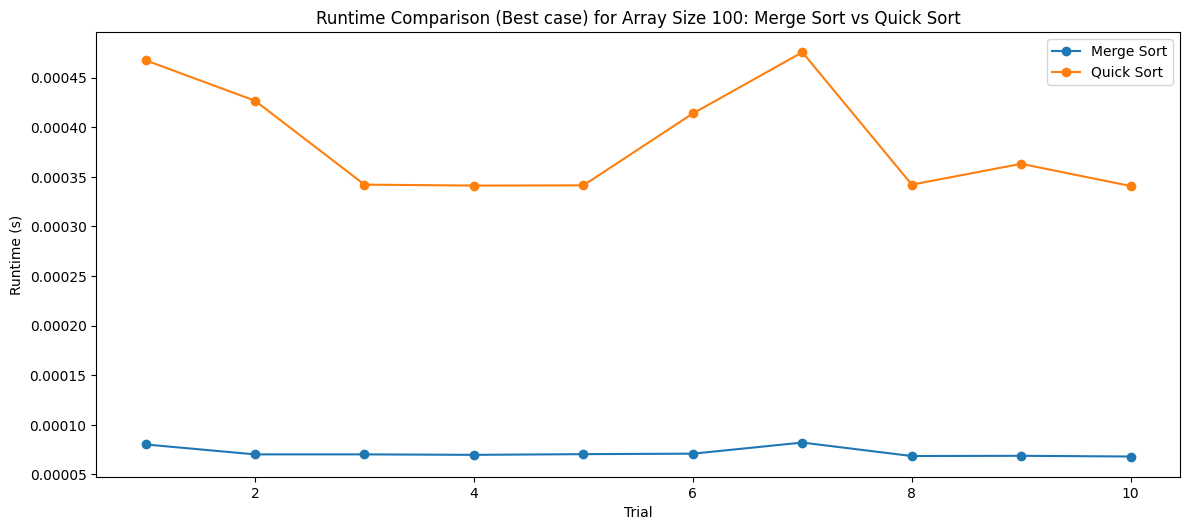

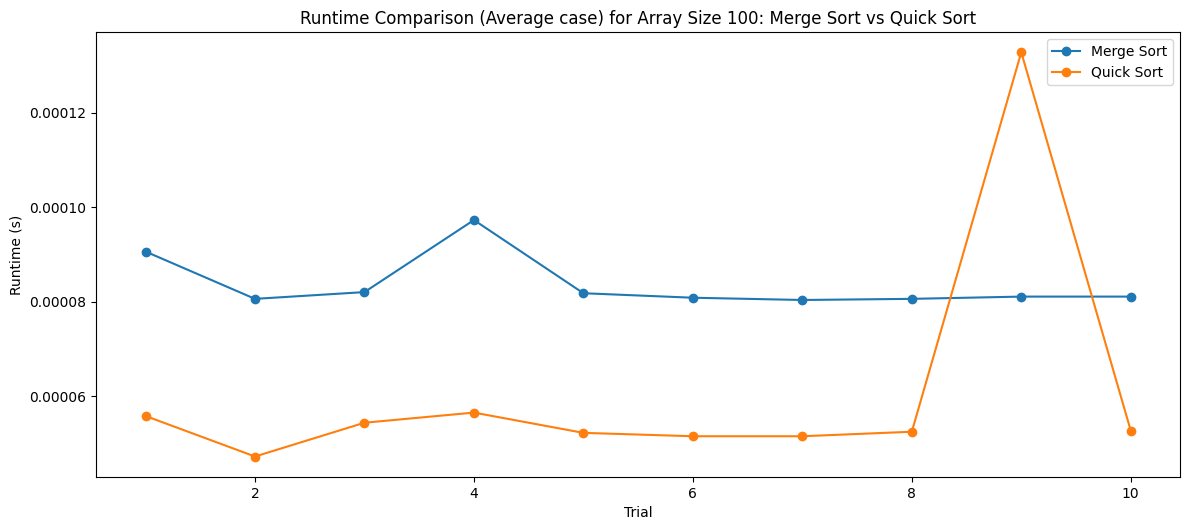

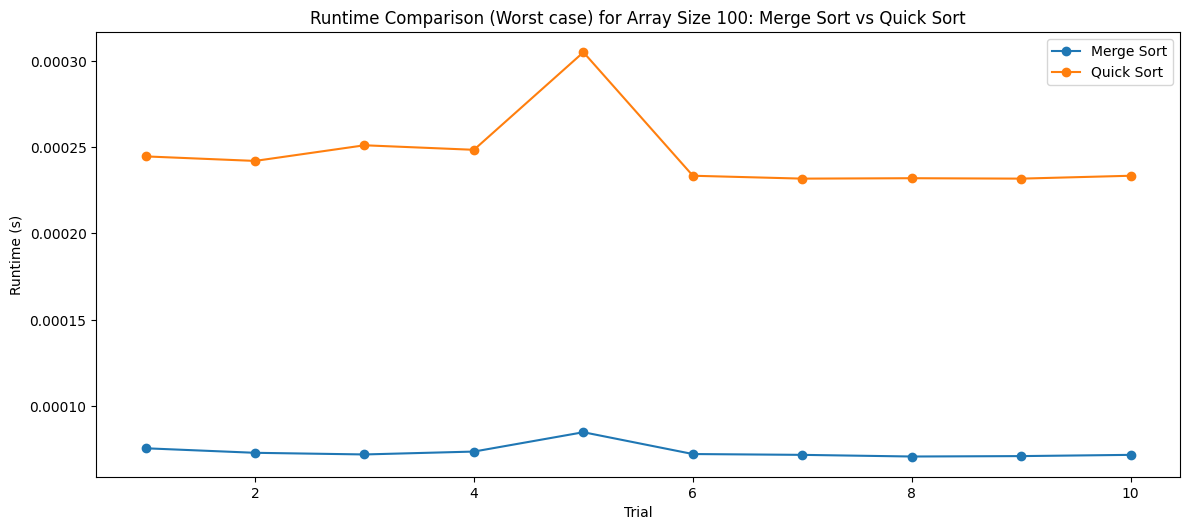

Size 500: No comparison point found where Quick Sort performs within the threshold ratio for the Best case.
Size 500: In the Average case, Quick Sort performs comparably to Merge Sort at trial 1 with 2348 swaps.
Size 500: No comparison point found where Quick Sort performs within the threshold ratio for the Worst case.


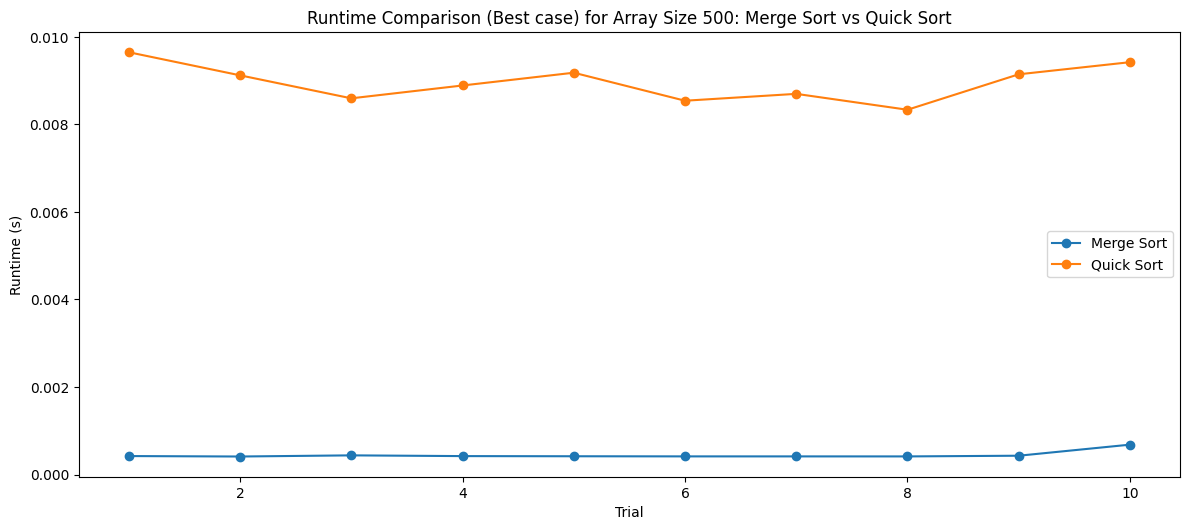

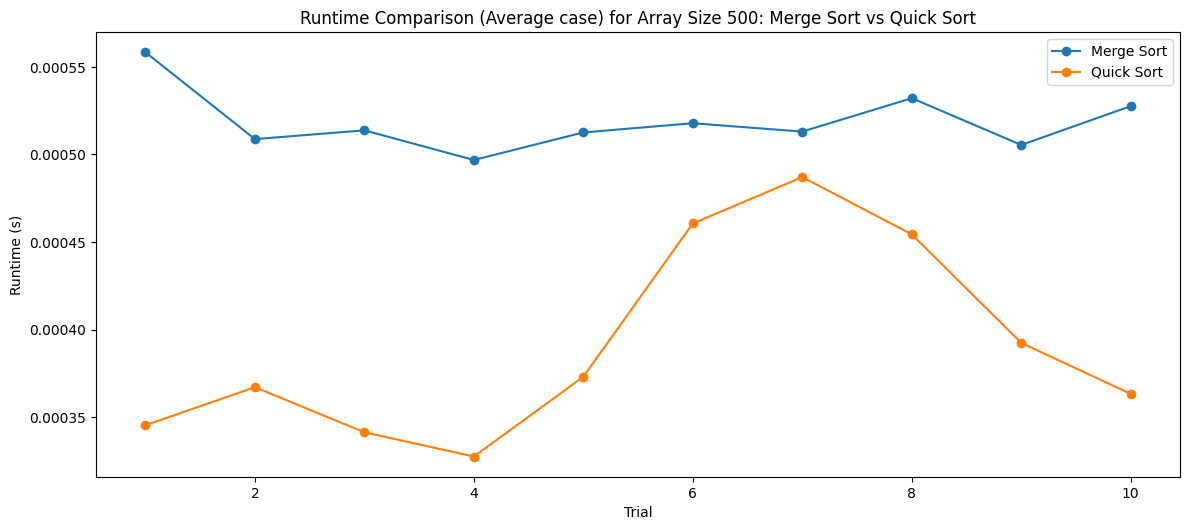

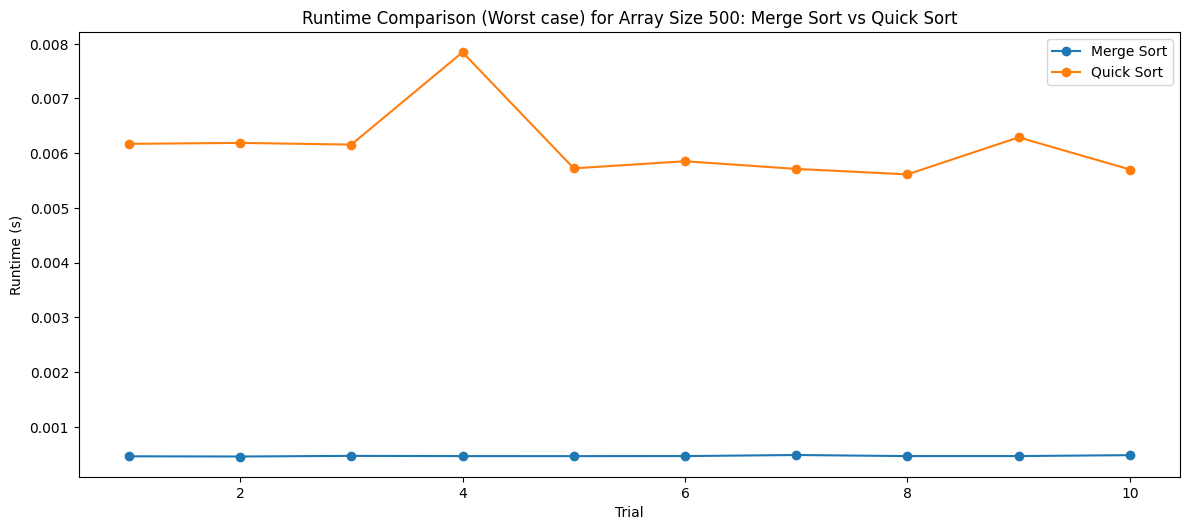

Size 1000: No comparison point found where Quick Sort performs within the threshold ratio for the Best case.
Size 1000: In the Average case, Quick Sort performs comparably to Merge Sort at trial 1 with 5250 swaps.
Size 1000: No comparison point found where Quick Sort performs within the threshold ratio for the Worst case.


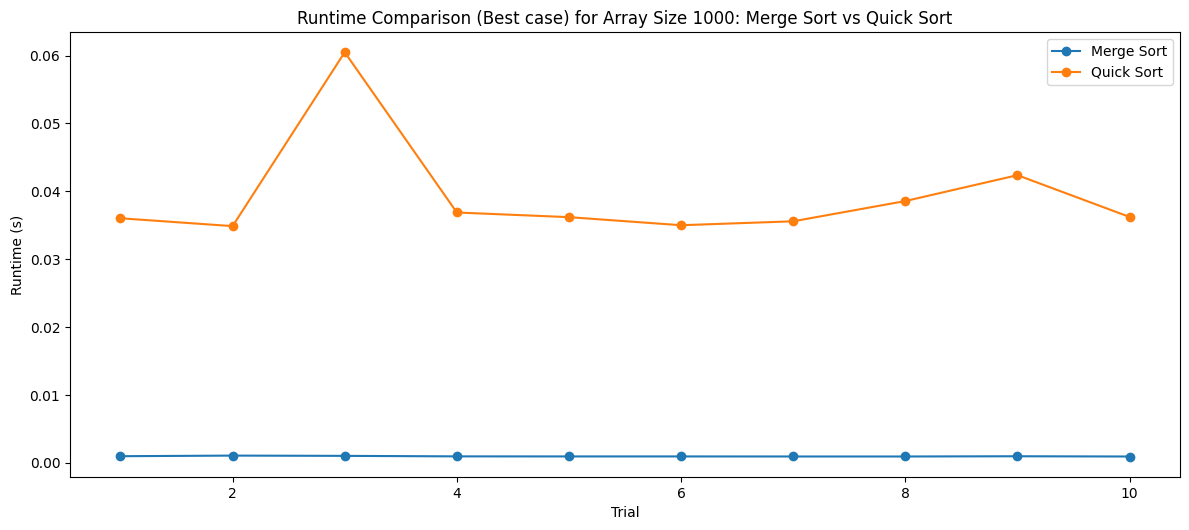

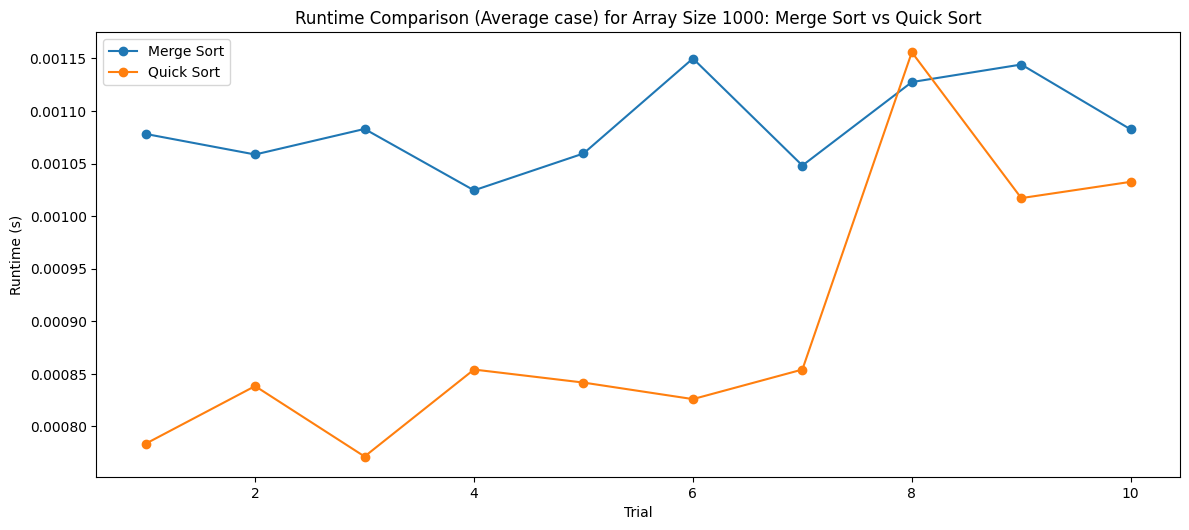

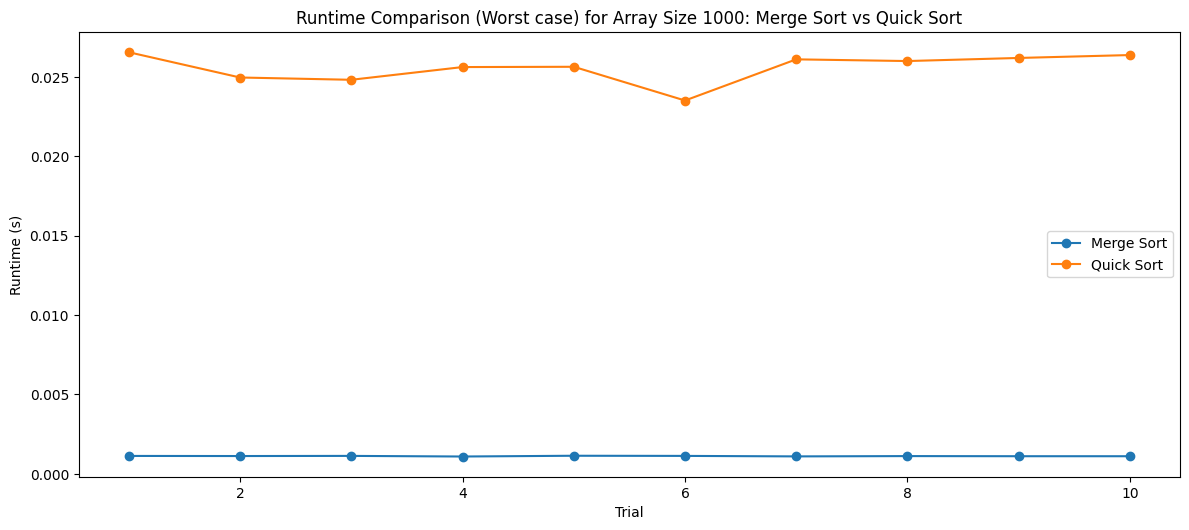

In [57]:
"""
This script compares the performance of Merge Sort and Quick Sort under different scenarios (Best, Average, Worst).

Functions:
- create_scenario_array(size, scenario): Creates an array based on the specified scenario.
- run_experiment(sort_func, array_size, scenario, trials): Runs the specified sorting function multiple times and records the runtime and swap counts (for Quick Sort).
- plot_results(merge_times, quick_times, swap_counts, scenario, array_size): Plots runtime comparisons between Merge Sort and Quick Sort.
- find_comparison_point(merge_times, quick_times, quick_swaps, threshold_ratio): Finds the trial where Quick Sort's performance is comparable to Merge Sort based on a threshold ratio.

Process:
1. Define array sizes, scenarios, and number of trials.
2. Run experiments for both sorting algorithms in each scenario, recording runtimes and swap counts.
3. Analyze the data to find points where Quick Sort performs similarly to Merge Sort.
4. Plot the results for a visual comparison of the two algorithms' performance.

Notes:
- The script aims to understand under which conditions Quick Sort's performance is on par with Merge Sort.
"""


def create_scenario_array(size, scenario):
    if scenario == 'Average':
        return [random.randint(0, size) for _ in range(size)]
    elif scenario == 'Worst':
        return list(range(size, 0, -1))
    elif scenario == 'Best':
        return list(range(1, size + 1))

def run_experiment(sort_func, array_size, scenario, trials):
    times = []
    swap_counts = []
    
    for _ in range(trials):
        data = create_scenario_array(array_size, scenario)
        start_time = time.time()
        swap_count = [0]
        if sort_func == quickSort_2:
            
            swap_count[0] = sort_func(data, 0, len(data) - 1, swap_count)
            swap_counts.append(swap_count[0]) 
        else:
            sort_func(data)  # For Merge Sort
        end_time = time.time()
        times.append(end_time - start_time)
    
    return times, swap_counts

def plot_results(merge_times, quick_times, swap_counts, scenario, array_size):
    plt.figure(figsize=(12, 10))

    # Plotting runtime comparison
    plt.subplot(2, 1, 1)
    trials = range(1, len(merge_times) + 1)
    plt.plot(trials, merge_times, label='Merge Sort', marker='o')
    plt.plot(trials, quick_times, label='Quick Sort', marker='o')
    plt.xlabel('Trial')
    plt.ylabel('Runtime (s)')
    plt.title(f'Runtime Comparison ({scenario} case) for Array Size {array_size}: Merge Sort vs Quick Sort')
    plt.legend()

    plt.tight_layout()
    plt.show()



def find_comparison_point(merge_times, quick_times, quick_swaps, threshold_ratio=1.25):
    comparison_points = {}

    sorted_indices = np.argsort(quick_swaps)
    sorted_quick_times = np.array(quick_times)[sorted_indices]
    sorted_merge_times = np.array(merge_times)
    sorted_quick_swaps = np.array(quick_swaps)[sorted_indices]

    for i in range(len(sorted_quick_times)):
        if sorted_quick_times[i] <= sorted_merge_times[i] * threshold_ratio:
            comparison_points = {
                'trial': i + 1,
                'swaps': sorted_quick_swaps[i],
                'quick_time': sorted_quick_times[i],
                'merge_time': sorted_merge_times[i]
            }
            break
    return comparison_points
array_sizes = [100, 500,1000] 
scenarios = ['Best', 'Average', 'Worst']
trials = 10

merge_sort_results = {scenario: {size: [] for size in array_sizes} for scenario in scenarios}
quick_sort_results = {scenario: {size: [] for size in array_sizes} for scenario in scenarios}
swap_counts = {scenario: {size: [] for size in array_sizes} for scenario in scenarios}

for size in array_sizes:
    for scenario in scenarios:
        merge_sort_results[scenario][size], _ = run_experiment(mergeSort, size, scenario, trials)
        quick_sort_results[scenario][size], swap_counts[scenario][size] = run_experiment(quickSort_2, size, scenario, trials)

for size in array_sizes:
    comparison_points = {}
    for scenario in scenarios:
        comparison_points[scenario] = find_comparison_point(
            merge_sort_results[scenario][size], 
            quick_sort_results[scenario][size],  
            swap_counts[scenario][size],        
            threshold_ratio=1.25                 
        )

    for scenario, points in comparison_points.items():
        if points:
            print(f"Size {size}: In the {scenario} case, Quick Sort performs comparably to Merge Sort at trial "
                  f"{points['trial']} with {points['swaps']} swaps.")
        else:
            print(f"Size {size}: No comparison point found where Quick Sort performs within the threshold ratio for the {scenario} case.")

    # Plot results for this size
    for scenario in scenarios:
        plot_results(
            merge_sort_results[scenario][size], 
            quick_sort_results[scenario][size], 
            swap_counts[scenario][size], 
            scenario,
            size
        )

In this section, provide a detailed outline of:
- The experiments you ran and the rationale behind your worst case scenario.
- The plots showing the run times.

Further explain how you computed the swaps and verify that you calculation is correct, by applying it on a diifferent list under same experimental conditions.

**Reflection**:

---
---

### PART F

Traditionally, Insertion Sort is worst than Heap Sort and Merge Sort. Now that you are a master at critical evaluation of sorting and searching algorithms, design an experiment to show that this may not be universally true. That is, there maybe scenarios where insertion sort is better than merge and heap sort.

HINT: Think about the Best Case of insertion sort.

Again, provide:
- An explicit outline of the experiments you ran. That is, list length values, how many “runs”, etc.
- A graph of list length vs time displaying the appropriate three curves showing. List lengths should be small here.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.
- Reflect on why these are experiments are important. 

HINT: Can you create some sort of "hybrid" sort that would be better?

## Experiment:
hybrid sorting techniques improves sorting tasks. These hybrid methods aim to switch between different sorting approaches based on the size of the list they're sorting.

#### Basics: 
  - **Algorithms**: Insertion Sort, Heap Sort, Merge Sort
  - **Hybrid**: 
    - **HybridSort1**: Uses Insertion Sort for small lists (20 items or less) and Merge Sort for bigger ones.
    - **HybridSort2**: Uses Insertion Sort for small lists (20 items or less), Heap Sort for medium lists (21 to 60 items), and Merge Sort for larger lists (more than 60 items).
- **List Sizes**: We tested with 15, 50, 75, 500, and 1000 items.
- **Trials**: We repeated each sort 100 times to get reliable results.
- **List Types**: We used almost sorted lists made with a `create_nearly_sorted_array` function.

### Showing the Results
- **Graphs**: We used graphs to show the average time each algorithm took to sort lists of different sizes.
- **Data Display**: The graphs showed lines for each algorithm, making it easy to compare how they each did with nearly sorted lists.

### Conclusion:
  - HybridSort1, which switches between Insertion Sort and Merge Sort, worked better than each on its own for lists of certain sizes.
  - HybridSort2, with its three-level approach, aimed to offer good performance across a wider range of list sizes.
  - Traditional Insertion Sort was really fast with almost sorted lists, especially when the lists were small.
  - Hybrid sorting methods are promising because they combine the strengths of different sorting methods, adjusting to the size and type of the list.
  - Both HybridSort1 and HybridSort2 lead to better performance, especially for lists that fall into their specific size ranges.
  - The graphs and performance data support these points, showing that HybridSort1 and HybridSort2 often did better than traditional methods for their ideal list sizes.
  - These findings are important for developing better data processing tools, especially when data varies a lot in size and structure.
  - Hybrid sorting methods could greatly improve performance in systems where sorting is a major bottleneck, making them a valuable tool for optimization.


In [58]:
def create_nearly_sorted_array(size):
    """Creates a nearly sorted array of a given size."""
    arr = [i for i in range(size)]
    arr[-1], arr[-2] = arr[-2], arr[-1]  # Swap last two elements
    return arr

def insertionSort(arr):
    """Sorts an array using the insertion sort algorithm."""
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

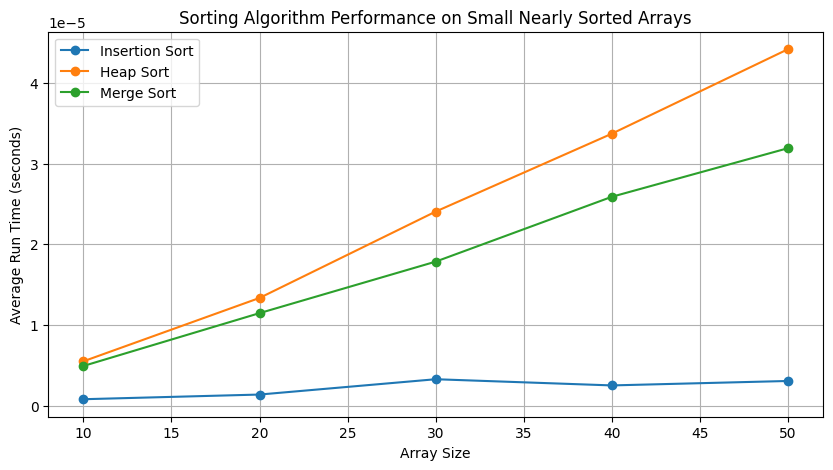

In [59]:
#Comparing between insertion sort, merge sort and heap sort. In which insertion sort is faster than both of the sorting algorithms because for small datasets insertion sort is faster than merge sort and heap sort

# Define the small dataset size
small_dataset_size = [10, 20, 30, 40, 50]
num_trials = 100

# Record the average run times for small datasets
average_run_times = {
    'InsertionSort': [],
    'HeapSort': [],
    'MergeSort': []
}

for size in small_dataset_size:
    insertion_times = [run_sorting_algorithm(insertionSort, create_nearly_sorted_array(size)) for _ in range(num_trials)]
    heap_times = [run_sorting_algorithm(heapSort, create_nearly_sorted_array(size)) for _ in range(num_trials)]
    merge_times = [run_sorting_algorithm(mergeSort, create_nearly_sorted_array(size)) for _ in range(num_trials)]

    average_run_times['InsertionSort'].append(np.mean(insertion_times))
    average_run_times['HeapSort'].append(np.mean(heap_times))
    average_run_times['MergeSort'].append(np.mean(merge_times))

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(small_dataset_size, average_run_times['InsertionSort'], marker='o', label='Insertion Sort')
plt.plot(small_dataset_size, average_run_times['HeapSort'], marker='o', label='Heap Sort')
plt.plot(small_dataset_size, average_run_times['MergeSort'], marker='o', label='Merge Sort')
plt.xlabel('Array Size')
plt.ylabel('Average Run Time (seconds)')
plt.title('Sorting Algorithm Performance on Small Nearly Sorted Arrays')
plt.legend()
plt.grid(True)
plt.show()


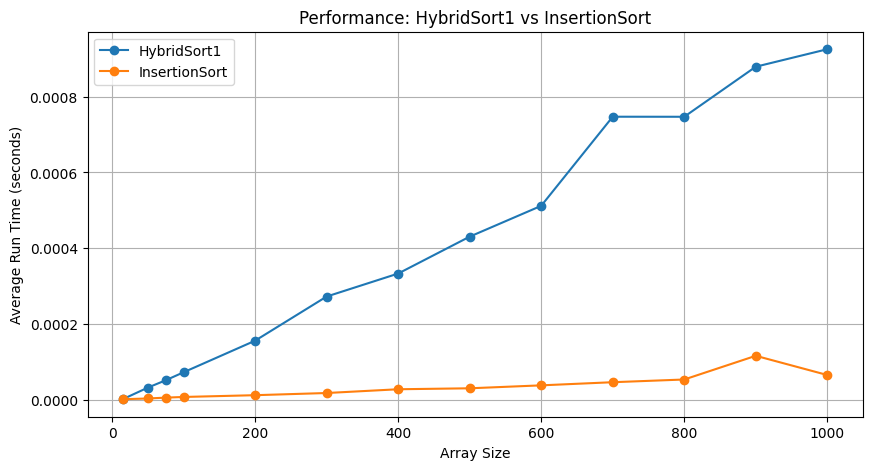

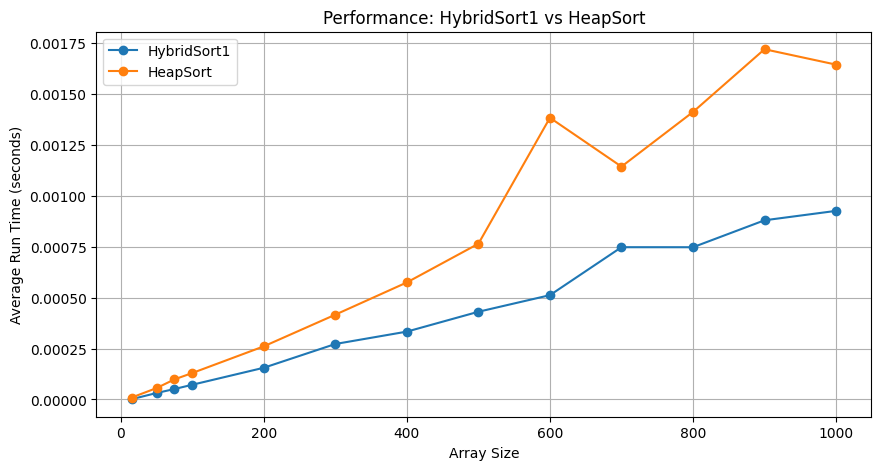

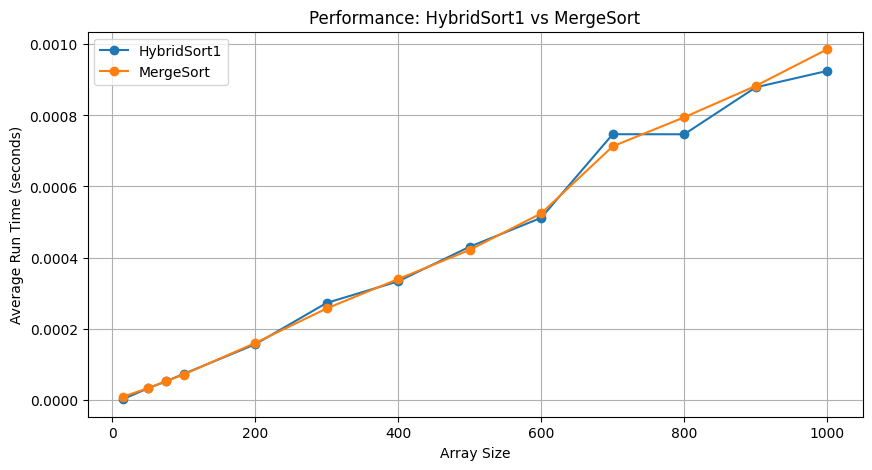

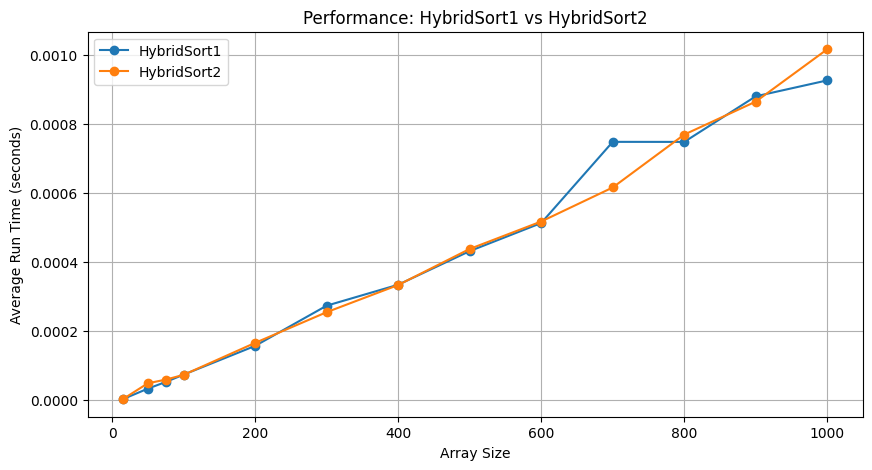

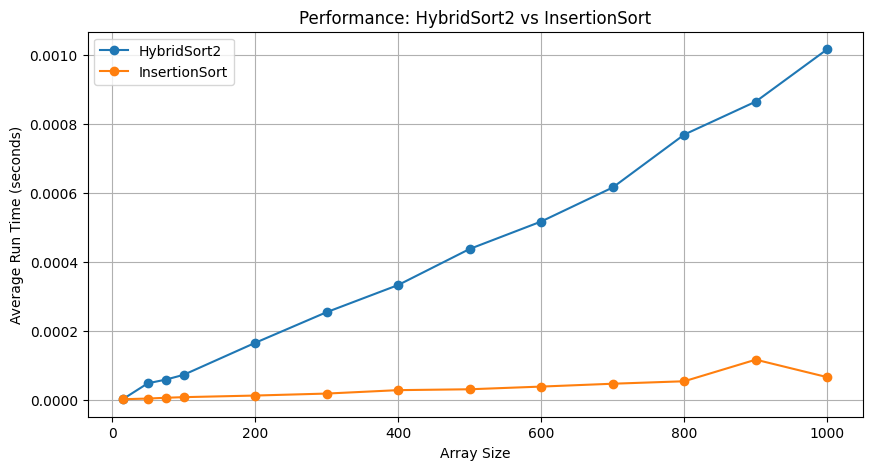

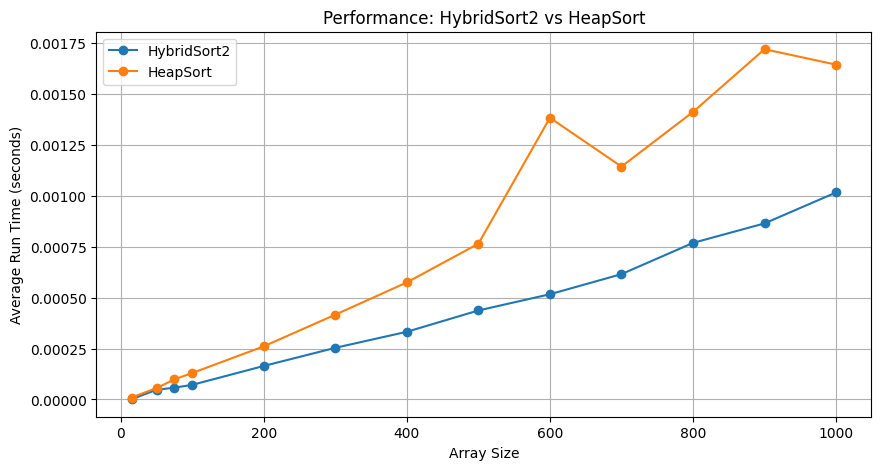

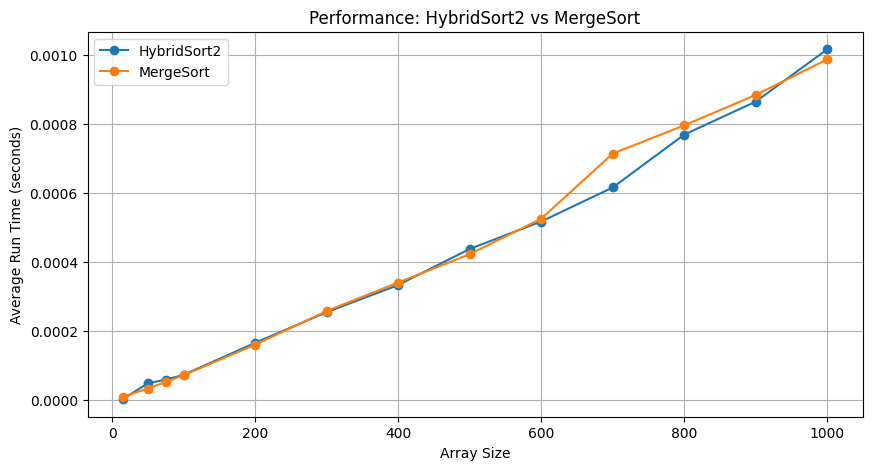

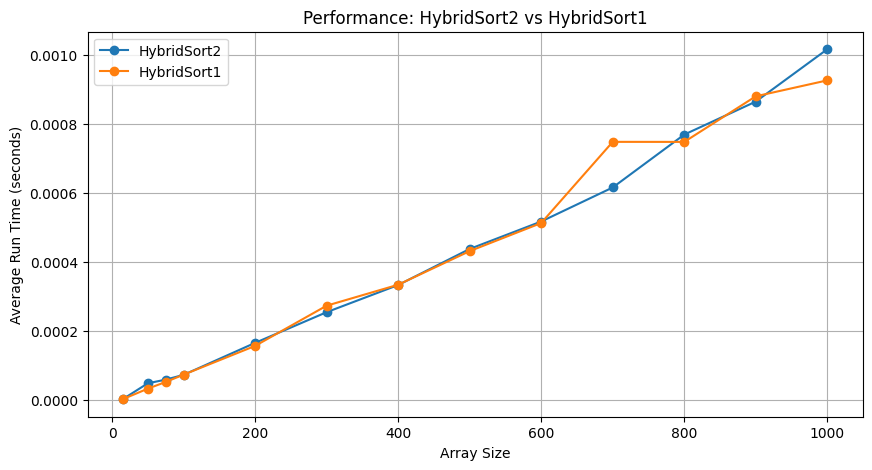

In [60]:
"""
This script evaluates the performance of two hybrid sorting algorithms against conventional sorting algorithms (Insertion Sort, Heap Sort, and Merge Sort).

Functions:
- hybrid_sort_1(array): Uses Insertion Sort for small arrays (<= 20 elements) and Merge Sort for larger arrays.
- hybrid_sort_2(array): Uses Insertion Sort for very small arrays (<= 20 elements), Heap Sort for medium-sized arrays (<= 60 elements), and Merge Sort for larger arrays.
- execute_experiments(sorting_algorithms, list_lengths, num_trials): Runs each sorting algorithm multiple times on nearly sorted arrays of various lengths and records the average runtime.

Process:
1. Define the list lengths for the experiments, the number of trials, and the sorting algorithms (including the two hybrid sorts).
2. Execute the experiments, recording the average runtime for each algorithm across different array sizes.
3. Plot the performance of HybridSort1 and HybridSort2 against the other sorting algorithms.

Notes:
- The purpose is to determine if the hybrid sorting algorithms offer any performance benefit over traditional sorting algorithms, especially on nearly sorted arrays.
- Results are visualized in line graphs, showing the average runtimes across array sizes, allowing for easy comparison of the algorithms' efficiencies.
"""


def hybrid_sort_1(array):
    if len(array) <= 20:
        insertionSort(array)
    else:
        mergeSort(array)

def hybrid_sort_2(array):
    if len(array) <= 20:
        insertionSort(array)
    elif len(array) <= 60:
        heapSort(array)
    else:
        mergeSort(array)


def execute_experiments(sorting_algorithms, list_lengths, num_trials):
    results = {alg: [] for alg in sorting_algorithms}
    for length in list_lengths:
        for alg_name, sort_func in sorting_algorithms.items():
            avg_time = np.mean([run_sorting_algorithm(sort_func, create_nearly_sorted_array(length)) for _ in range(num_trials)])
            results[alg_name].append(avg_time)
    return results

# Experiment setup
list_lengths = [15, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
num_trials = 30
sorting_algorithms = {
    'InsertionSort': insertionSort,
    'HeapSort': heapSort,
    'MergeSort': mergeSort,
    'HybridSort1': hybrid_sort_1,
    'HybridSort2': hybrid_sort_2
}

# Execute experiments
results = execute_experiments(sorting_algorithms, list_lengths, num_trials)

# Plot the results for HybridSort1 vs other algorithms
for alg_name, times in results.items():
    if alg_name != 'HybridSort1':
        plt.figure(figsize=(10, 5))
        plt.plot(list_lengths, results['HybridSort1'], marker='o', label='HybridSort1')
        plt.plot(list_lengths, times, marker='o', label=alg_name)
        plt.xlabel('Array Size')
        plt.ylabel('Average Run Time (seconds)')
        plt.title(f'Performance: HybridSort1 vs {alg_name}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Plot the results for HybridSort2 vs other algorithms
for alg_name, times in results.items():
    if alg_name != 'HybridSort2':
        plt.figure(figsize=(10, 5))
        plt.plot(list_lengths, results['HybridSort2'], marker='o', label='HybridSort2')
        plt.plot(list_lengths, times, marker='o', label=alg_name)
        plt.xlabel('Array Size')
        plt.ylabel('Average Run Time (seconds)')
        plt.title(f'Performance: HybridSort2 vs {alg_name}')
        plt.legend()
        plt.grid(True)
        plt.show()


**Reflection**:

---
---

**Team Contributions**: In below section describe in detail how you distributed the workload and contributions of each member in the task.

### Ankur Pandey (pandea23) = Part A and B 
### Aarav Pant (panta3) = Part C and D
### Megh Joshi (joshim20) = Part E and F

---
---